In [29]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('csv/house1006.csv')
df.columns=[ 'Unnamed: 0','ID', 'Transaction Date', 'Unit Price', 'Total Price', 
              'Real Estate Total Price', 'Building Transfer Area', 'Layout Rooms', 
              'Layout Living Rooms', 'Layout Bathrooms', 'Layout Partitions', 'Building Type - Commercial and Residential Building', 
              'Building Type - Apartment', 'Building Type - Other', 'Building Type - Townhouse', 
              'Building Age', 'Material - Brick', 'Material - Reinforced Concrete', 'Material - Steel', 
              'Material - Bamboo and Wood', 'Elevator (Code)', 'Arcade Included (Code)', 
              'Roof Included (Code)', 'First and Second Floor Included (Code)', 'Parking Included(Code)', 
              'Balcony Included(Code)', 'Additional Land Included(Code)', 'Management Organization(Code)', 'Latitude', 
              'Longitude', 'Bad Count', 'Good Count', 'Residential', 'Commercial', 'Industrial', 'Agricultural']

In [32]:
match_value = df['Total Price'] == df['Real Estate Total Price']
equal_count = match_value.sum()
total = len(df)
print(f"相等的比例:{equal_count/total*100:.2f}")

相等的比例:78.92


In [33]:
# 計算 u_price1 和 u_price2
u_price1 = np.round(df['Total Price'] / df['Building Transfer Area'])
u_price2 = np.round(df['Real Estate Total Price'] / df['Building Transfer Area'])

# 檢查 'Unit Price' 是否等於 u_price1 或 u_price2
u_price1_match_value = df['Unit Price'] == u_price1
u_price2_match_value = df['Unit Price'] == u_price2

# 計算 u_price1 和 u_price2 相等的行數
u_price1_equal_count = u_price1_match_value.sum()
u_price2_equal_count = u_price2_match_value.sum()

# 計算總行數
total = len(df)

# 輸出結果
print(f"u_price1 與 'Unit Price' 相等的數量: {u_price1_equal_count}")
print(f"u_price2 與 'Unit Price' 相等的數量: {u_price2_equal_count}")


u_price1 與 'Unit Price' 相等的數量: 187400
u_price2 與 'Unit Price' 相等的數量: 184795


In [34]:
df = df.drop(columns=['Latitude', 'Longitude', 'Unnamed: 0', 'ID','Real Estate Total Price'], errors='ignore')

In [35]:
df.shape

(240149, 31)

In [36]:
df.columns

Index(['Transaction Date', 'Unit Price', 'Total Price',
       'Building Transfer Area', 'Layout Rooms', 'Layout Living Rooms',
       'Layout Bathrooms', 'Layout Partitions',
       'Building Type - Commercial and Residential Building',
       'Building Type - Apartment', 'Building Type - Other',
       'Building Type - Townhouse', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Elevator (Code)',
       'Arcade Included (Code)', 'Roof Included (Code)',
       'First and Second Floor Included (Code)', 'Parking Included(Code)',
       'Balcony Included(Code)', 'Additional Land Included(Code)',
       'Management Organization(Code)', 'Bad Count', 'Good Count',
       'Residential', 'Commercial', 'Industrial', 'Agricultural'],
      dtype='object')

In [37]:
# 計算 'Unit Price' 為 0 的行數
unit_price_zero = (df['Unit Price'] == 0).sum()

# 計算 'Total Price' 為 0 的行數
total_price_zero = (df['Total Price'] == 0).sum()

Building_Transfer_Area = (df['Building Transfer Area'] == 0).sum()

# 輸出結果
print(f"'Unit Price' 為 0 的行數: {unit_price_zero}")
print(f"'Total Price' 為 0 的行數: {total_price_zero}")
print(f"'Building_Transfer_Area' 為 0 的行數: {Building_Transfer_Area}")

'Unit Price' 為 0 的行數: 32
'Total Price' 為 0 的行數: 1
'Building_Transfer_Area' 為 0 的行數: 2


In [38]:
df.isnull().sum()

Transaction Date                                          0
Unit Price                                             1605
Total Price                                               0
Building Transfer Area                                    0
Layout Rooms                                              0
Layout Living Rooms                                       0
Layout Bathrooms                                          0
Layout Partitions                                         0
Building Type - Commercial and Residential Building       0
Building Type - Apartment                                 0
Building Type - Other                                     0
Building Type - Townhouse                                 0
Building Age                                              0
Material - Brick                                          0
Material - Reinforced Concrete                            0
Material - Steel                                          0
Material - Bamboo and Wood              

In [39]:
# 找出 [單價元平方公尺] 為 NaN 或者為 0 的行
mask = (df['Unit Price'].isna()) | (df['Unit Price'] == 0)

# 計算 [總價元] / [建物移轉總面積平方公尺]，針對滿足條件的行進行計算
df.loc[mask, 'Unit Price'] = df.loc[mask, 'Total Price'] / df.loc[mask, 'Building Transfer Area']

# 查看更新後的數據
print(df[mask][['Total Price', 'Building Transfer Area', 'Unit Price']].head())

      Total Price  Building Transfer Area    Unit Price
1133     38130000                  629.70  60552.644116
1140     11700000                  197.28  59306.569343
1305      9511976                  334.47  28438.951176
1791      1800000                   82.52  21812.893844
1937     41580000                  865.86  48021.620123


In [40]:
df.isnull().sum()

Transaction Date                                       0
Unit Price                                             0
Total Price                                            0
Building Transfer Area                                 0
Layout Rooms                                           0
Layout Living Rooms                                    0
Layout Bathrooms                                       0
Layout Partitions                                      0
Building Type - Commercial and Residential Building    0
Building Type - Apartment                              0
Building Type - Other                                  0
Building Type - Townhouse                              0
Building Age                                           0
Material - Brick                                       0
Material - Reinforced Concrete                         0
Material - Steel                                       0
Material - Bamboo and Wood                             0
Elevator (Code)                

In [41]:
# 計算 'Unit Price' 為 0 的行數
unit_price_zero = (df['Unit Price'] == 0).sum()

# 計算 'Total Price' 為 0 的行數
total_price_zero = (df['Total Price'] == 0).sum()

Building_Transfer_Area = (df['Building Transfer Area'] == 0).sum()

# 輸出結果
print(f"'Unit Price' 為 0 的行數: {unit_price_zero}")
print(f"'Total Price' 為 0 的行數: {total_price_zero}")
print(f"'Building_Transfer_Area' 為 0 的行數: {Building_Transfer_Area}")

'Unit Price' 為 0 的行數: 1
'Total Price' 為 0 的行數: 1
'Building_Transfer_Area' 為 0 的行數: 2


In [42]:
# 先定義條件，篩選 'Unit Price', 'Total Price', 'Building Transfer Area' 不為 0 的行
condition = (df['Unit Price'] != 0) & (df['Total Price'] != 0) & (df['Building Transfer Area'] != 0)

# 根據條件篩選並移除為 0 的行
df = df[condition]

# 檢查處理後的數據
print(f"處理後的數據行數: {len(df)}")


處理後的數據行數: 240146


In [43]:
# 計算 'Unit Price' 為 0 的行數
unit_price_zero = (df['Unit Price'] == 0).sum()

# 計算 'Total Price' 為 0 的行數
total_price_zero = (df['Total Price'] == 0).sum()

Building_Transfer_Area = (df['Building Transfer Area'] == 0).sum()

# 輸出結果
print(f"'Unit Price' 為 0 的行數: {unit_price_zero}")
print(f"'Total Price' 為 0 的行數: {total_price_zero}")
print(f"'Building_Transfer_Area' 為 0 的行數: {Building_Transfer_Area}")

'Unit Price' 為 0 的行數: 0
'Total Price' 為 0 的行數: 0
'Building_Transfer_Area' 為 0 的行數: 0


In [44]:
# 獲取 DataFrame 中的所有欄位
columns = df.columns.tolist()

# 將 [單價元平方公尺] 欄位移到列表的最後
columns.remove('Unit Price')
columns.append('Unit Price')

# 根據新的欄位順序重新排列 DataFrame
df = df[columns]

In [45]:
pd.set_option('display.max_columns', None)
df.head()

Transaction Date  Total Price  Building Transfer Area  Layout Rooms  \
0       2022-09-02      2170000                   43.51      0.250000   
1       2022-08-01      4500000                   69.20      0.428571   
2       2022-08-04      8440000                  130.97      0.000000   
3       2022-08-01      1200000                  110.40      0.444444   
4       2022-08-01     10600000                   81.05      0.400000   

   Layout Living Rooms  Layout Bathrooms  Layout Partitions  \
0             0.250000          0.250000           0.250000   
1             0.142857          0.285714           0.142857   
2             0.000000          0.000000           0.000000   
3             0.222222          0.222222           0.111111   
4             0.200000          0.300000           0.100000   

   Building Type - Commercial and Residential Building  \
0                                                  1     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Building Type - Apartment  Building Type - Other  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Building Type - Townhouse  Building Age  Material - Brick  \
0                          0            27                 0   
1                          1            47                 1   
2                          1            22                 0   
3                          1            46                 1   
4                          1            60                 1   

   Material - Reinforced Concrete  Material - Steel  \
0                               1                 0   
1                               1                 0   
2                               0                 1   
3                               1                 0   
4                               0                 0   

   Material - Bamboo and Wood  Elevator (Code)  Arcade Included (Code)  \
0                           0              1.0                       0   
1                           0              0.0                       0   
2                           0              0.0                       0   
3                           0              0.0                       0   
4                           0              0.0                       0   

   Roof Included (Code)  First and Second Floor Included (Code)  \
0                     0                                       0   
1                     0                                       0   
2                     0                                       0   
3                     0                                       0   
4                     0                                       0   

   Parking Included(Code)  Balcony Included(Code)  \
0                       0                       1   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   Additional Land Included(Code)  Management Organization(Code)  Bad Count  \
0                               0                              1       23.0   
1                               0                              0        5.0   
2                               1                              0        5.0   
3                               0                              0        1.0   
4                               1                              0        5.0   

   Good Count  Residential  Commercial  Industrial  Agricultural  Unit Price  
0         1.0            0           1           0             0   

1. Unnamed: 0: 沒有對應名稱，通常是自動生成的索引欄位
2. 編號: ID
3. 交易年月日: Transaction Date
4. 單價元平方公尺: Unit Price
5. 總價元: Total Price
6. 房地總價元: Real Estate Total Price
7. 建物移轉總面積平方公尺: Building Transfer Area
8. 格局比例_房: Layout Rooms
9. 格局比例_廳: Layout Living Rooms
10. 格局比例_衛: Layout Bathrooms
11. 格局比例_隔間: Layout Partitions
12. 建築型態_住商大樓: Building Type - Commercial and Residential Building
13. 建築型態_公寓: Building Type - Apartment
14. 建築型態_其他: Building Type - Other
15. 建築型態_透天厝: Building Type - Townhouse
16. 屋齡: Building Age
17. 建材_磚石: Material - Brick
18. 建材_鋼筋: Material - Reinforced Concrete
19. 建材_鋼骨: Material - Steel
20. 建材_竹木: Material - Bamboo and Wood
21. 電梯_數值化: Elevator (Numeric)
22. 包含騎樓_編碼: Arcade Included (Code)
23. 包含屋頂_編碼: Roof Included (Code)
24. 包含一二樓_編碼: First and Second Floor Included (Code)
25. 是否包含車位: Parking Included
26. 陽台有無: Balcony Included
27. 是否含額外土地: Additional Land Included
28. 有無管理組織: Management Organization
29. 緯度: Latitude
30. 經度: Longitude
31. bad_count: Bad Count
32. good_count: Good Count
33. 住: Residential
34. 商: Commercial
35. 工: Industrial
36. 農: Agricultural

In [46]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240146 entries, 0 to 240148
Data columns (total 31 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Transaction Date                                     240146 non-null  object 
 1   Total Price                                          240146 non-null  int64  
 2   Building Transfer Area                               240146 non-null  float64
 3   Layout Rooms                                         240146 non-null  float64
 4   Layout Living Rooms                                  240146 non-null  float64
 5   Layout Bathrooms                                     240146 non-null  float64
 6   Layout Partitions                                    240146 non-null  float64
 7   Building Type - Commercial and Residential Building  240146 non-null  int64  
 8   Building Type - Apartment                            240146

In [47]:
df.columns

Index(['Transaction Date', 'Total Price', 'Building Transfer Area',
       'Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions',
       'Building Type - Commercial and Residential Building',
       'Building Type - Apartment', 'Building Type - Other',
       'Building Type - Townhouse', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Elevator (Code)',
       'Arcade Included (Code)', 'Roof Included (Code)',
       'First and Second Floor Included (Code)', 'Parking Included(Code)',
       'Balcony Included(Code)', 'Additional Land Included(Code)',
       'Management Organization(Code)', 'Bad Count', 'Good Count',
       'Residential', 'Commercial', 'Industrial', 'Agricultural',
       'Unit Price'],
      dtype='object')

In [48]:
print(df['Unit Price'].describe())

count    2.401460e+05
mean     5.360124e+04
std      6.891261e+04
min      1.480000e+02
25%      3.517300e+04
50%      4.839100e+04
75%      6.555400e+04
max      2.134618e+07
Name: Unit Price, dtype: float64


In [49]:
print(df['Building Age'].describe())

count    240146.000000
mean         24.268228
std          32.942440
min         -87.000000
25%           0.000000
50%          17.000000
75%          31.000000
max         112.000000
Name: Building Age, dtype: float64


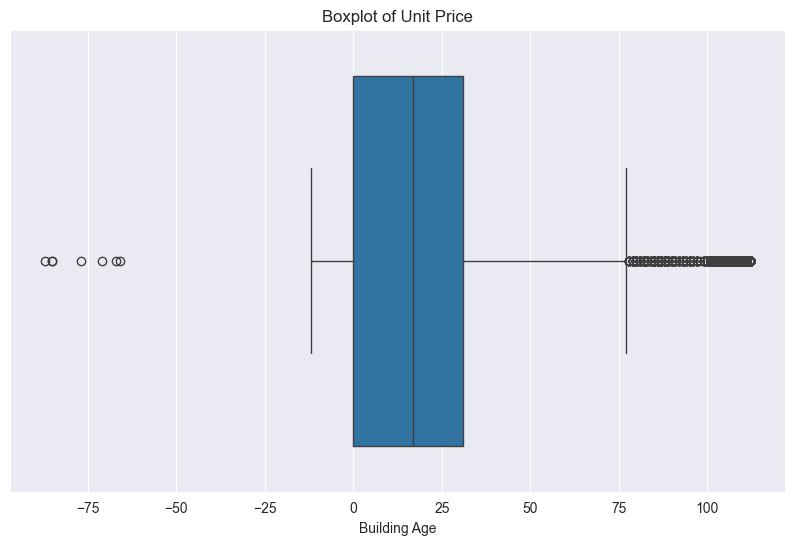

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Building Age'])
plt.title('Boxplot of Unit Price')
plt.show()

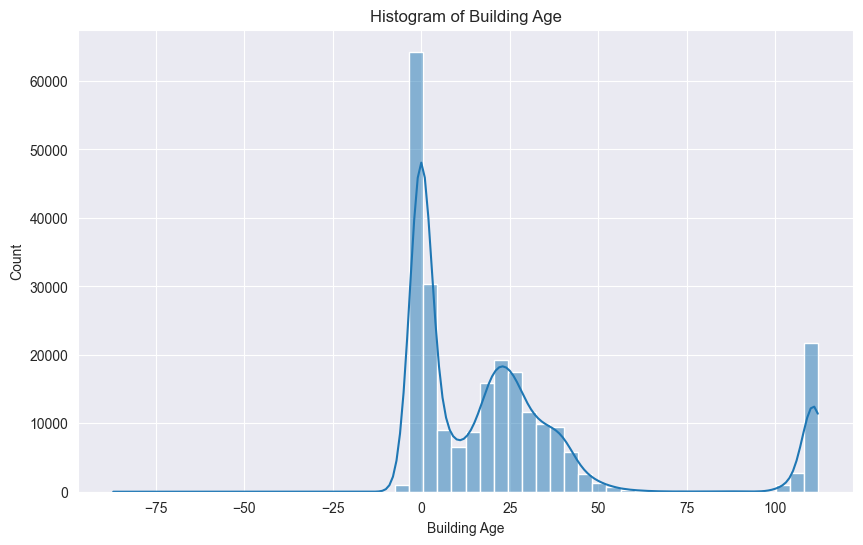

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製 'Building Age' 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['Building Age'], bins=50, kde=True)
plt.title('Histogram of Building Age')
plt.show()

In [52]:
mean = df['Building Age'].mean()
std = df['Building Age'].std()

# 計算極端值範圍
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# 篩選出極端值
outliers = df[(df['Building Age'] < lower_bound) | (df['Building Age'] > upper_bound)]

# 輸出極端值的數量
print(f"極端值數量: {len(outliers)}")
print(outliers[['Building Age']])


極端值數量: 4
        Building Age
78787            -77
79233            -85
79234            -85
197923           -87


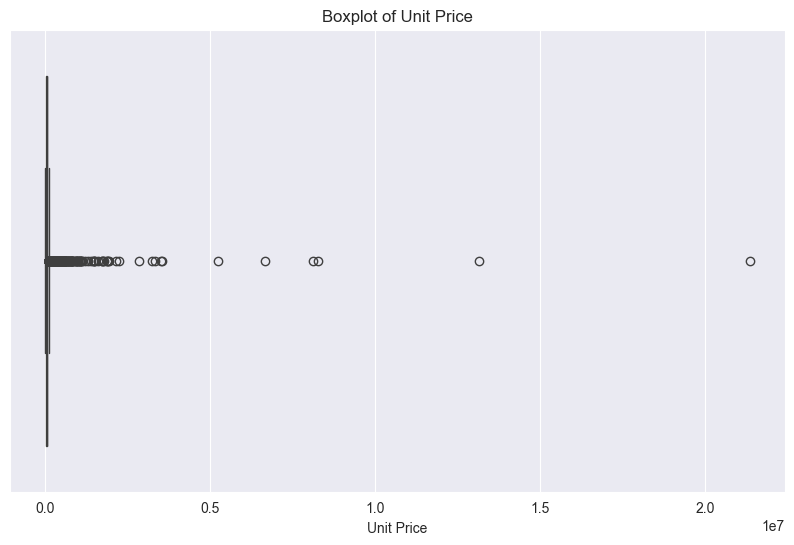

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Unit Price'])
plt.title('Boxplot of Unit Price')
plt.show()

### 四分位距法（IQR 法）：
- 適用於偏態分佈（非正態分佈）數據： IQR 法是基於數據的四分位距來檢查極端值，對於 偏態分佈 或 異常點較多 的數據更有效。- 它不依賴於均值或標準差，因此在數據中存在明顯的偏斜時（如右偏分佈或左偏分佈），IQR 法可以更準確地檢測極端值。
### 何時選擇 IQR 法：
- 如果數據顯示偏態分佈或包含多個極端值，IQR 法能更準確地反映數據中的異常點。
- 可以繪製 直方圖 或 箱形圖 來查看數據是否有偏斜。如果數據明顯偏態，IQR 法會更有效。

In [54]:
# 計算四分位數
Q1 = df['Unit Price'].quantile(0.25)
Q3 = df['Unit Price'].quantile(0.75)
IQR = Q3 - Q1

# 計算極端值範圍
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選出極端值
outliers = df[(df['Unit Price'] < lower_bound) | (df['Unit Price'] > upper_bound)]

# 輸出極端值的數量
print(f"極端值數量: {len(outliers)}")
print(outliers[['Unit Price']])


極端值數量: 7712
          Unit Price
4       1.307830e+05
44      1.183380e+05
64      1.165770e+05
67      1.122970e+05
83      1.244950e+05
158     1.211590e+05
192     1.144410e+05
272     1.168110e+05
416     3.629830e+05
463     1.180910e+05
479     2.423390e+05
511     1.115430e+05
525     1.112500e+05
527     1.629020e+05
540     1.305720e+05
546     1.152390e+05
560     1.000000e+06
598     1.704550e+05
646     1.182520e+05
655     1.469170e+05
687     1.747550e+05
728     2.081850e+05
751     1.284150e+05
788     1.244270e+05
824     1.196570e+05
828     1.340890e+05
842     1.120030e+05
864     1.136280e+05
915     1.119100e+05
921     1.176830e+05
973     1.287960e+05
977     1.308690e+05
982     1.126660e+05
983     1.308170e+05
984     1.115330e+05
986     1.270390e+05
987     1.133840e+05
1061    1.233910e+05
1259    1.345620e+05
1345    1.295780e+05
1423    1.367920e+05
1618    1.167470e+05
1710    1.169860e+05
1795    7.747810e+05
1857    2.035480e+05
1974    1.727810e+05
2

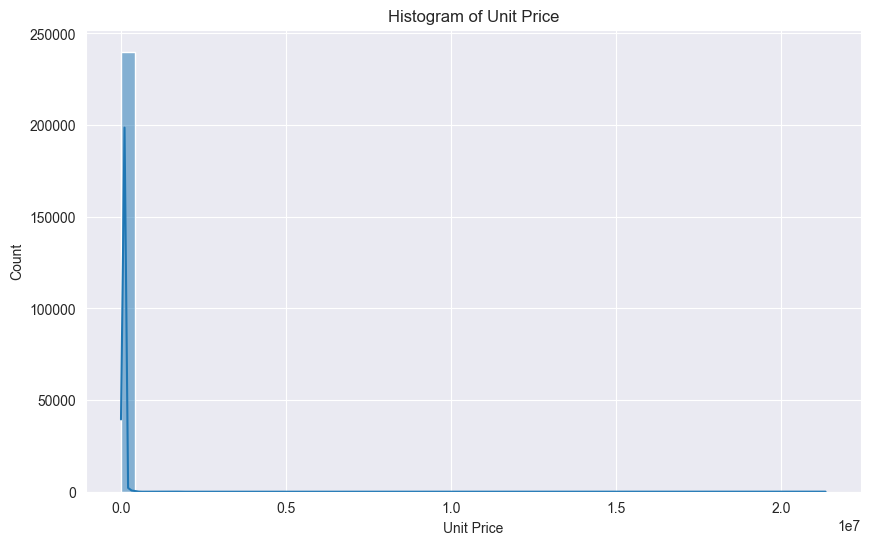

In [55]:
# 繪製 'Unit Price' 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit Price'], bins=50, kde=True)
plt.title('Histogram of Unit Price')
plt.show()


In [56]:
df_cleaned_iqr = df[~((df['Unit Price'] < lower_bound) | (df['Unit Price'] > upper_bound))]


In [57]:
df_cleaned = df_cleaned_iqr[~((df_cleaned_iqr['Building Age'] < lower_bound) | (df_cleaned_iqr['Building Age'] > upper_bound))]

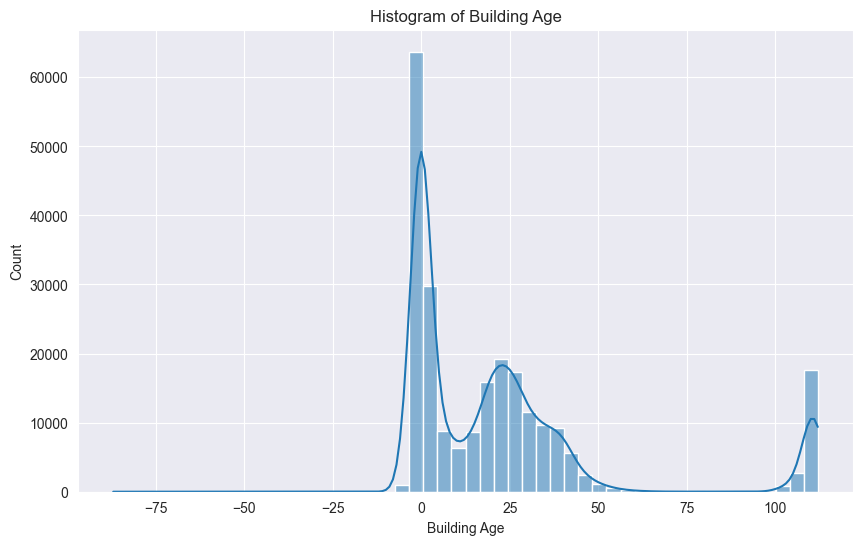

In [58]:
# 繪製 'Building Age' 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Building Age'], bins=50, kde=True)
plt.title('Histogram of Building Age')
plt.show()

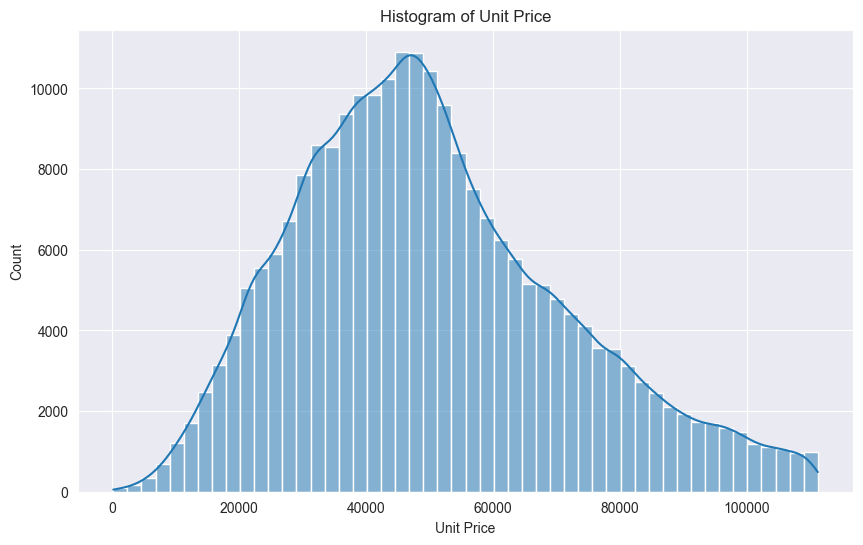

In [59]:
# 繪製 'Unit Price' 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Unit Price'], bins=50, kde=True)
plt.title('Histogram of Unit Price')
plt.show()

Text(0.5, 1.0, 'Distribution of Unit Price')

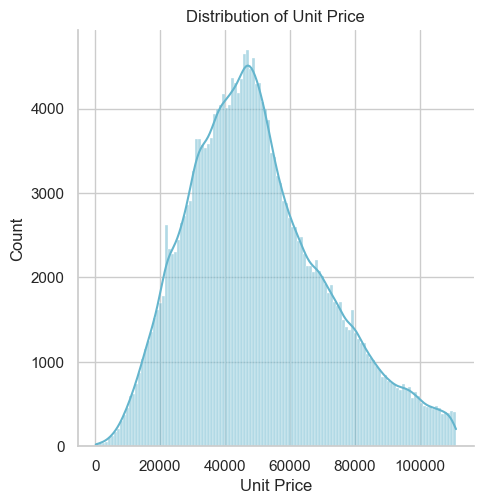

In [60]:
sns.set(style='whitegrid')
ax = sns.displot(df_cleaned['Unit Price'], kde = True, color= 'c') 
#核密度估計（KDE）曲線，這是一條平滑的曲線，用於估計數據的概率密度
plt.title('Distribution of Unit Price')

從刪除極端值後的直方圖來看，Unit Price（單價）的分佈顯示右偏分佈（右側尾部較長），這意味著大部分房價集中在低到中等範圍，而少部分房價較高，這是一個典型的房價分佈模式。

對數變換（Log Transformation）：
如果你要進行線性迴歸或其他需要正態分佈數據的模型，可以對 Unit Price 進行 對數變換。對數變換可以壓縮長尾的高價數據，使數據分佈更加對稱和平滑。

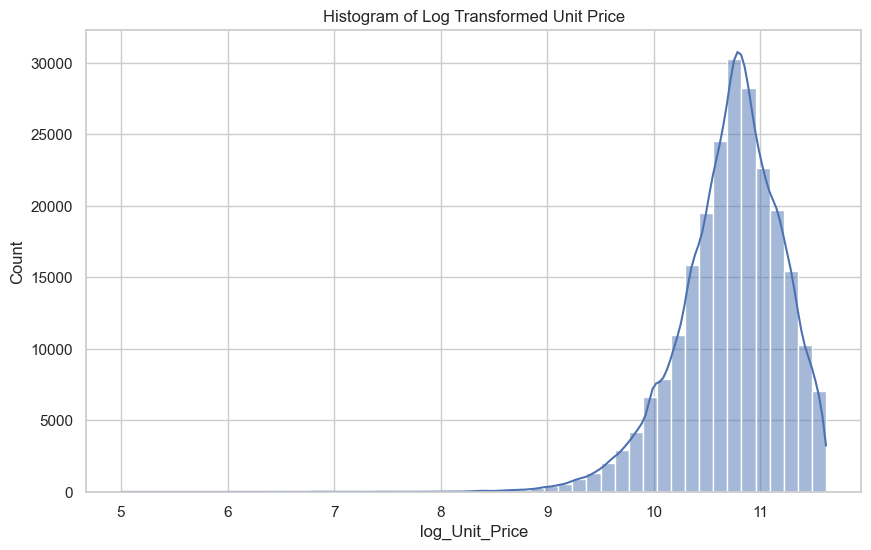

In [61]:
# 對數變換，使用 log1p 可以處理 0 值
df_cleaned['log_Unit_Price'] = np.log1p(df_cleaned['Unit Price'])

# 繪製對數變換後的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['log_Unit_Price'], bins=50, kde=True)
plt.title('Histogram of Log Transformed Unit Price')
plt.show()


In [62]:
df_cleaned.columns

Index(['Transaction Date', 'Total Price', 'Building Transfer Area',
       'Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions',
       'Building Type - Commercial and Residential Building',
       'Building Type - Apartment', 'Building Type - Other',
       'Building Type - Townhouse', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Elevator (Code)',
       'Arcade Included (Code)', 'Roof Included (Code)',
       'First and Second Floor Included (Code)', 'Parking Included(Code)',
       'Balcony Included(Code)', 'Additional Land Included(Code)',
       'Management Organization(Code)', 'Bad Count', 'Good Count',
       'Residential', 'Commercial', 'Industrial', 'Agricultural', 'Unit Price',
       'log_Unit_Price'],
      dtype='object')

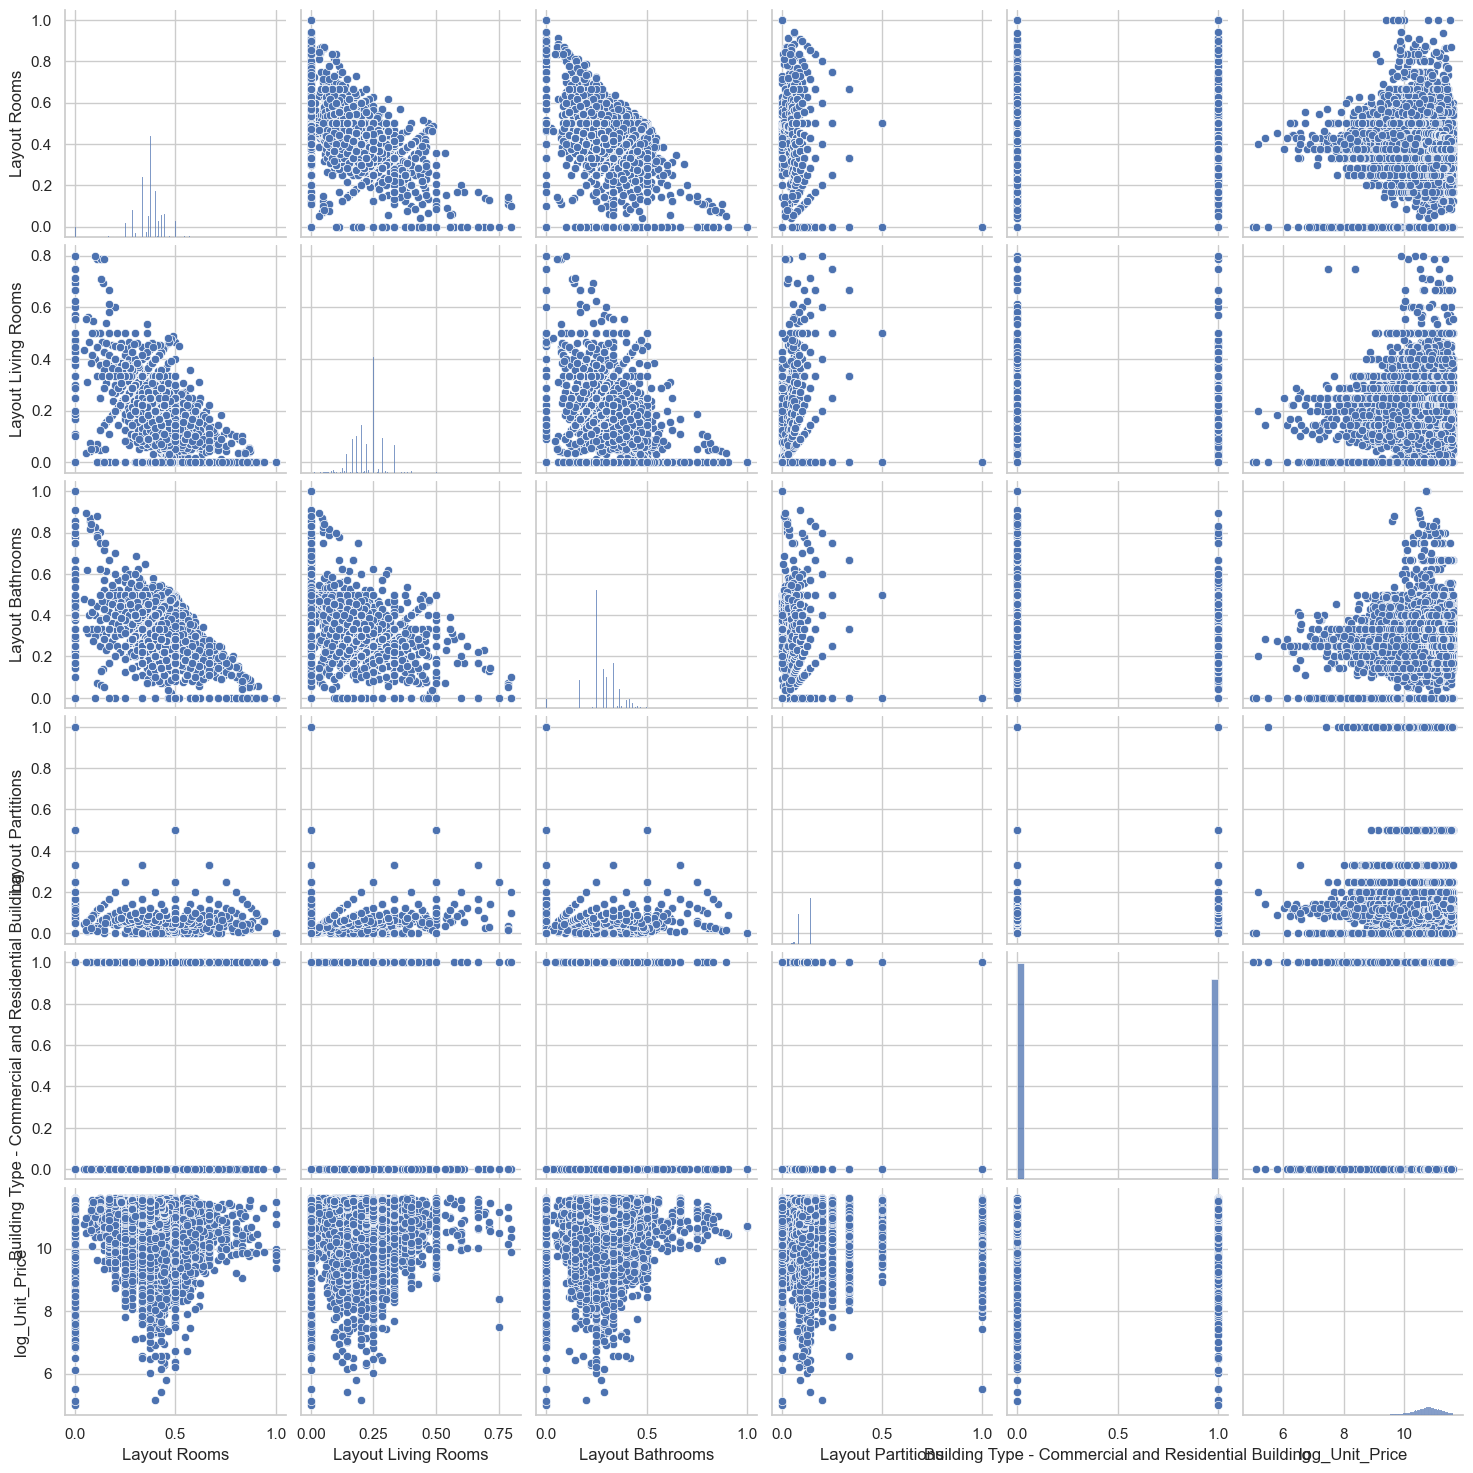

In [38]:
sns.pairplot(df_cleaned[['Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions',
       'Building Type - Commercial and Residential Building','log_Unit_Price']])

# 8. 格局比例_房: Layout Rooms
# 9. 格局比例_廳: Layout Living Rooms
# 10. 格局比例_衛: Layout Bathrooms
# 11. 格局比例_隔間: Layout Partitions
# 12. 建築型態_住商大樓: Building Type - Commercial and Residential Building


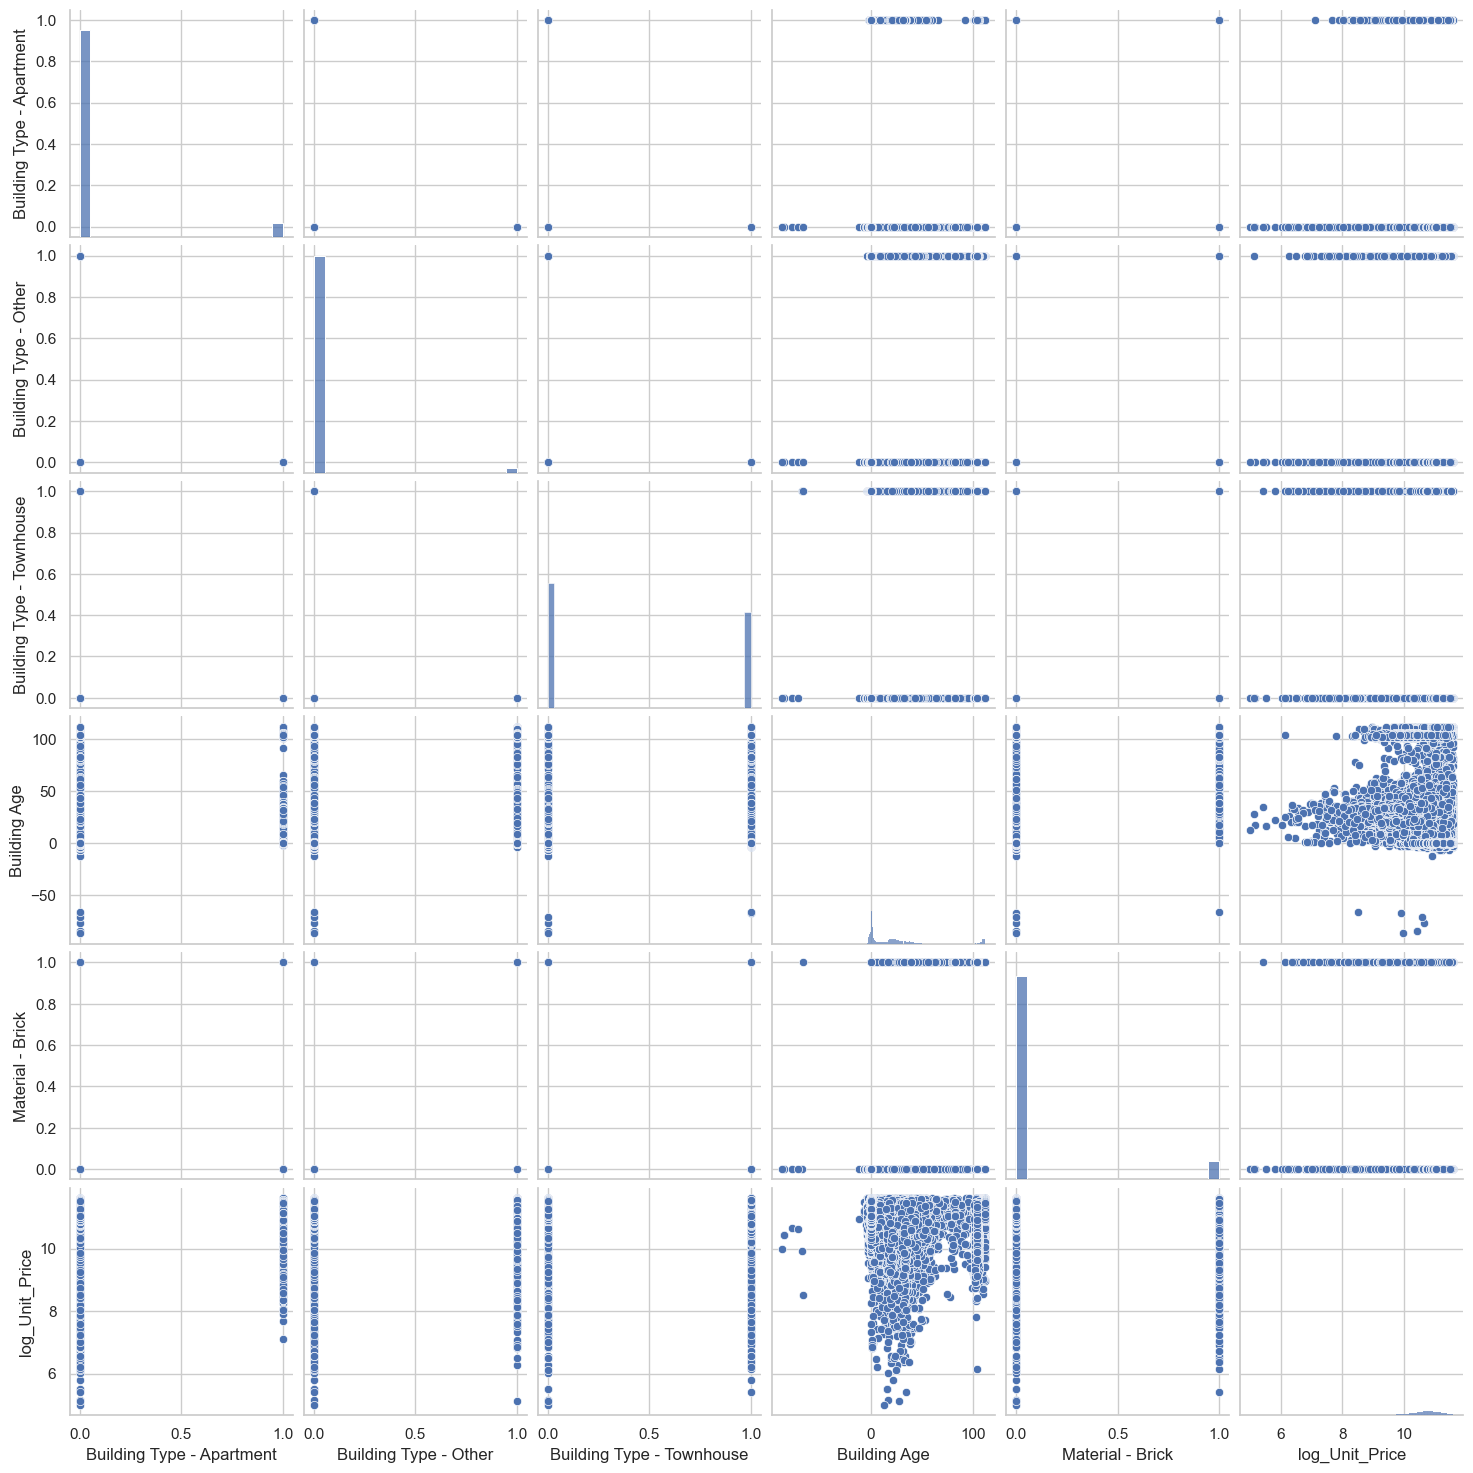

In [39]:
sns.pairplot(df_cleaned[['Building Type - Apartment', 'Building Type - Other',
       'Building Type - Townhouse', 'Building Age','Material - Brick','log_Unit_Price']])
# 13. 建築型態_公寓: Building Type - Apartment
# 14. 建築型態_其他: Building Type - Other
# 15. 建築型態_透天厝: Building Type - Townhouse
# 16. 屋齡: Building Age
# 17. 建材_磚石: Material - Brick

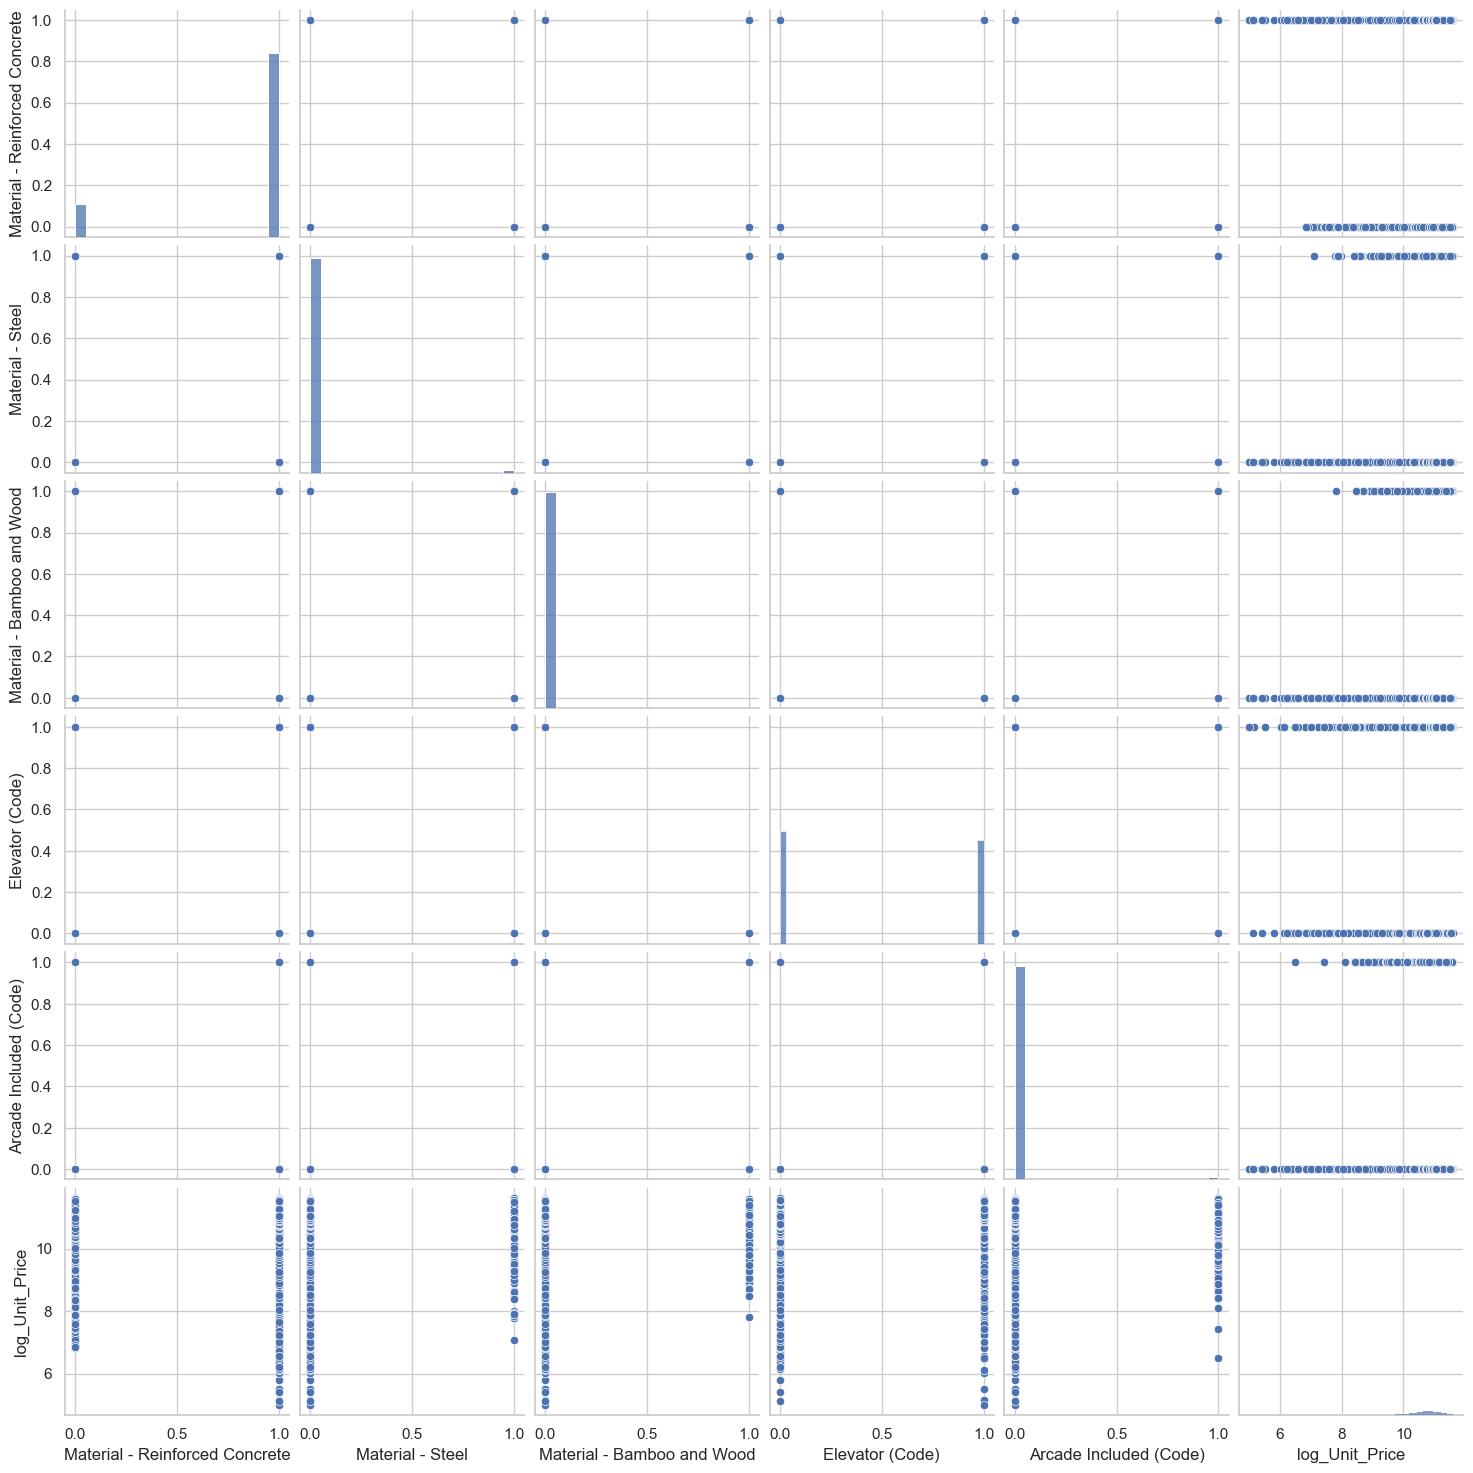

In [40]:
sns.pairplot(df_cleaned[[ 
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Elevator (Code)',
       'Arcade Included (Code)' ,'log_Unit_Price']])



# 18. 建材_鋼筋: Material - Reinforced Concrete
# 19. 建材_鋼骨: Material - Steel
# 20. 建材_竹木: Material - Bamboo and Wood
# 21. 電梯_數值化: Elevator (Numeric)
# 22. 包含騎樓_編碼: Arcade Included (Code)

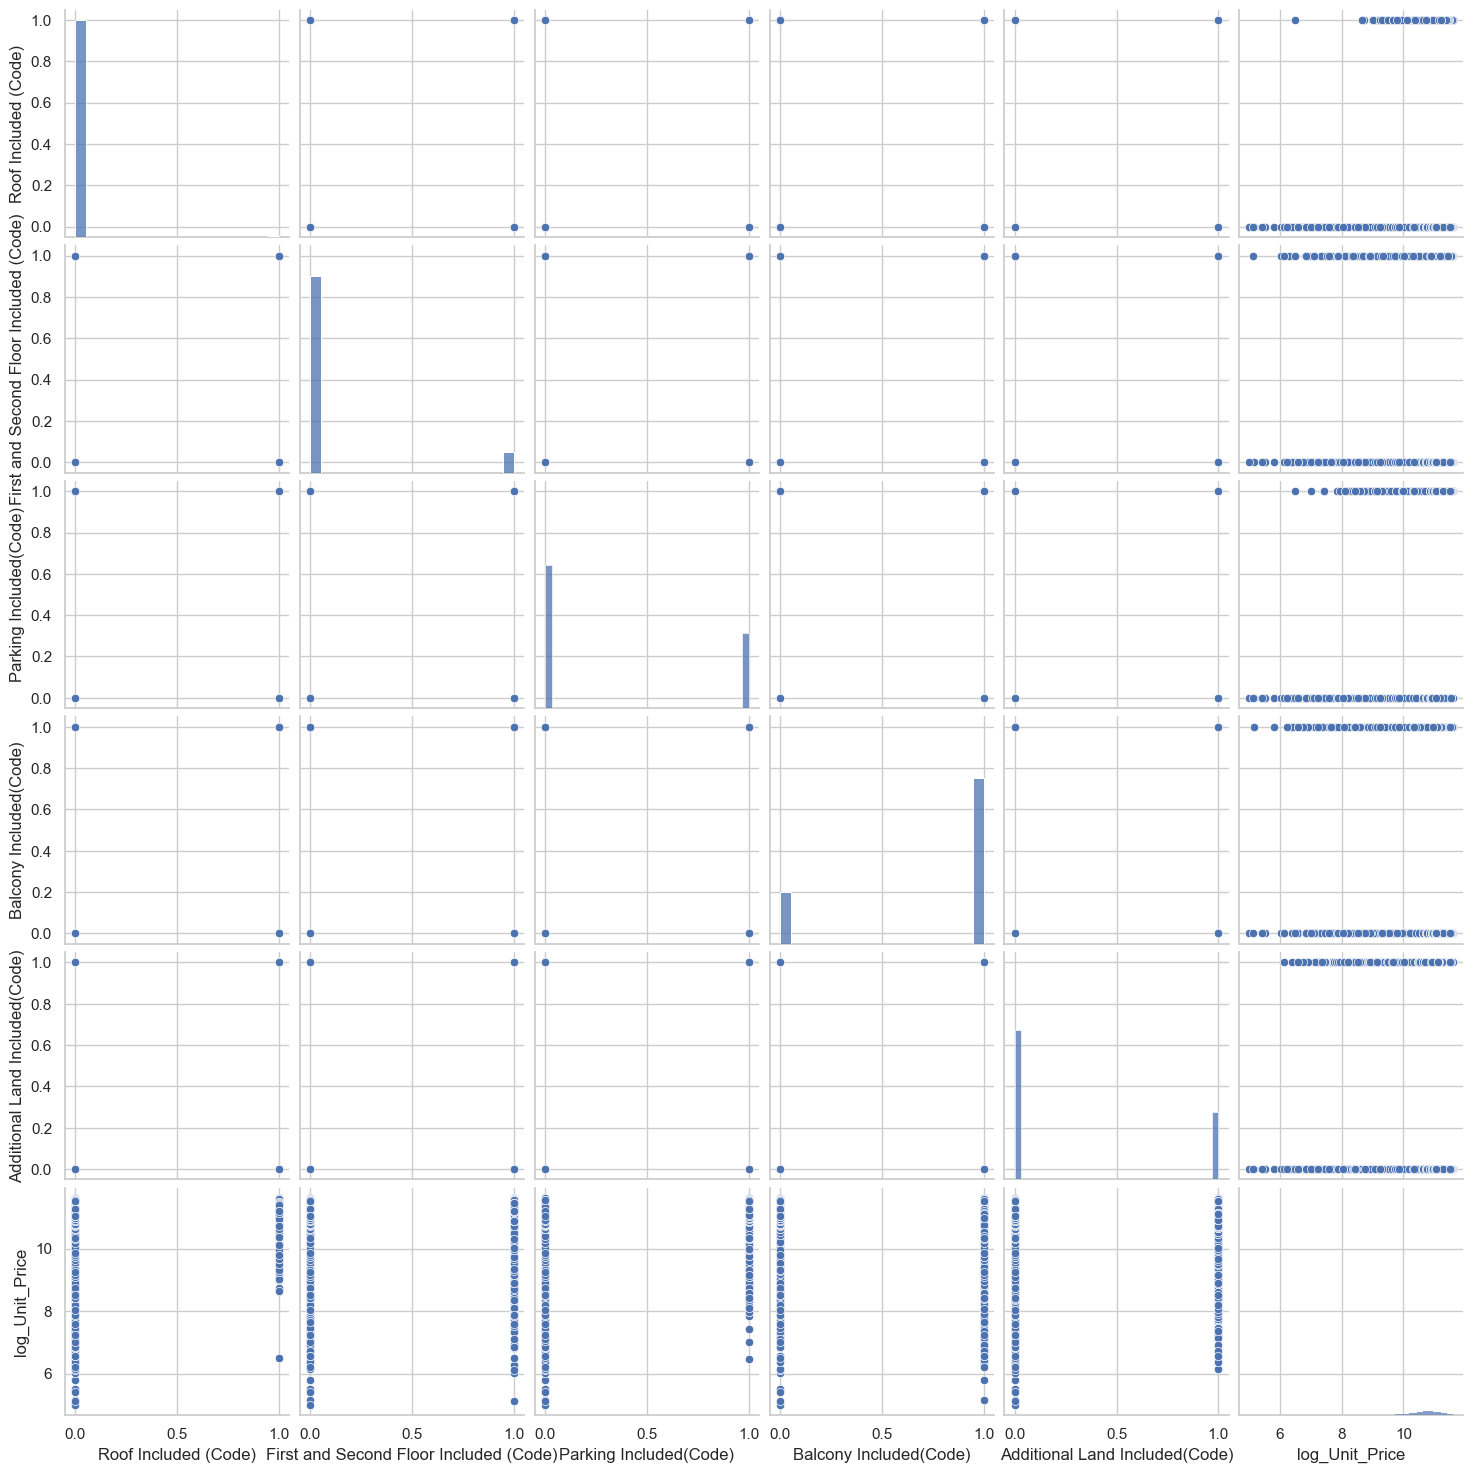

In [42]:
sns.pairplot(df_cleaned[[ 
       'Roof Included (Code)',
       'First and Second Floor Included (Code)', 'Parking Included(Code)',
       'Balcony Included(Code)','Additional Land Included(Code)','log_Unit_Price']])



# 23. 包含屋頂_編碼: Roof Included (Code)
# 24. 包含一二樓_編碼: First and Second Floor Included (Code)
# 25. 是否包含車位: Parking Included
# 26. 陽台有無: Balcony Included
# 27. 是否含額外土地: Additional Land Included

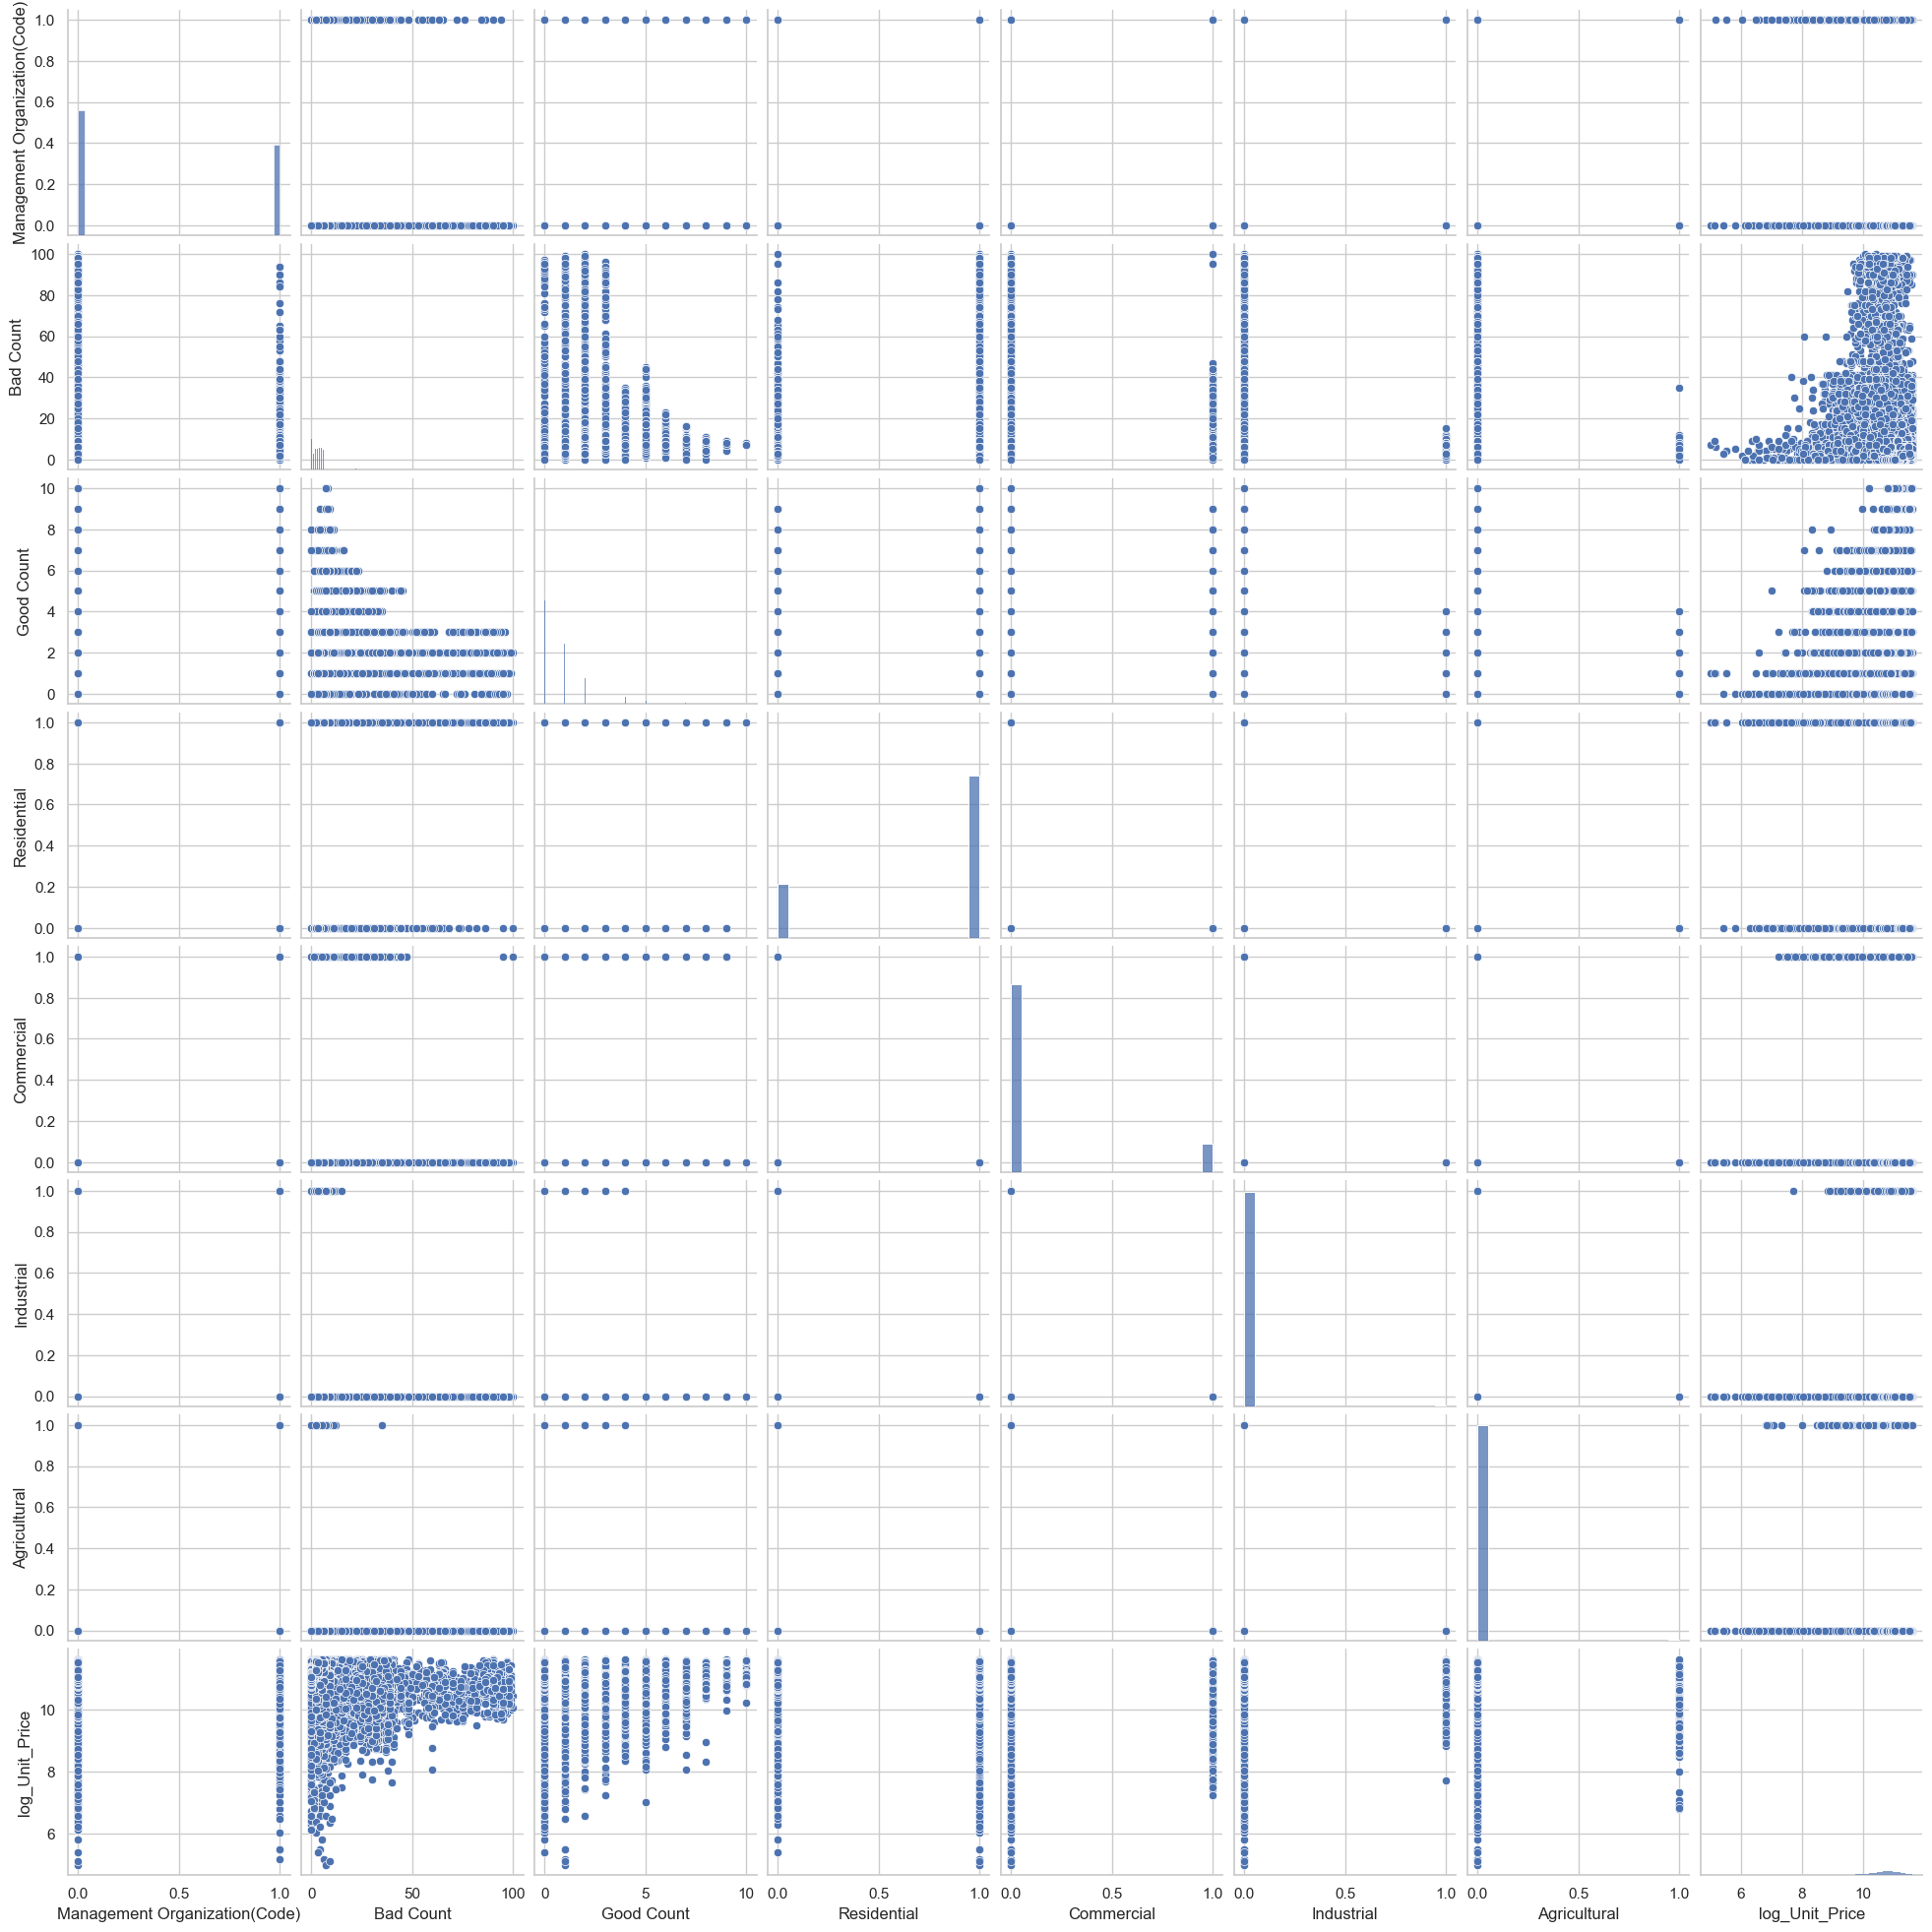

In [43]:
sns.pairplot(df_cleaned[[
       'Management Organization(Code)', 'Bad Count', 'Good Count',
       'Residential', 'Commercial', 'Industrial', 'Agricultural','log_Unit_Price']])


# 28. 有無管理組織: Management Organization
# 31. bad_count: Bad Count
# 32. good_count: Good Count
# 33. 住: Residential
# 34. 商: Commercial
# 35. 工: Industrial
# 36. 農: Agricultural

In [44]:
# 篩選出非數值型的欄位
non_numeric_columns = df_cleaned.select_dtypes(exclude=['float64', 'int64'])

# 查看這些欄位的名稱
print(non_numeric_columns.columns)

Index(['Transaction Date'], dtype='object')


### 第一張圖 (Part 1)：
這張圖展示了建築面積、格局比例、建築類型、建材等變數與 log_Unit_Price（經對數變換的單價）以及彼此之間的相關性。

#### Total Price 與 Building Transfer Area 的相關性：

- Total Price 與 Building Transfer Area 的相關性很高，達到 0.81，這是符合邏輯的，因為建築面積越大，總價通常越高。
#### log_Unit_Price（對數變換後的單價）與其他特徵的相關性：

- log_Unit_Price 與 Total Price 的相關性為 0.27，這意味著總價對單價有一定的影響，但相關性並不強。
- 與 建築類型（如 Building Type - Apartment、Building Type - Townhouse）的相關性不強，相關係數在 0.1 到 0.25 之間，說明這些建築類型對單價影響有限。
- 與 Building Age（屋齡）的相關性較小（約 0.13），表示屋齡對單價有輕微影響。
#### 建築材料（Materials）與單價：

- Material - Brick 和 Material - Reinforced Concrete（鋼筋混凝土）對 log_Unit_Price 的影響較小，分別為 0.073 和 -0.12。這表明建材對單價的影響不是很明顯。

### 第二張圖 (Part 2) ：
這張圖展示了與建築管理、停車位等有關的特徵與 log_Unit_Price 之間的相關性，以及這些特徵彼此之間的相關性。

#### log_Unit_Price 與 Parking Included (Code) 的相關性：

- log_Unit_Price 與 Parking Included 的相關性為 0.25，這表明有停車位的房產價格通常較高。這也是合理的，因為有停車位的房產往往會賣得更貴。
#### Elevator (Code) 和 Management Organization (Code)：

- Elevator（電梯）與 log_Unit_Price 的相關性為 0.13，說明有電梯的房產對單價有一定的影響，但不是非常顯著。
- Management Organization（管理組織）與單價的相關性很小，為 -0.058，表明管理組織的存在對單價影響不大。
#### 特徵之間的強相關性：

- Elevator 和 Parking Included 之間的相關性達到了 0.7，這表明有電梯的建築物通常也會有停車位。
- Management Organization 和 Elevator 的相關性為 0.67，這表明有電梯的建築物通常也有管理組織。

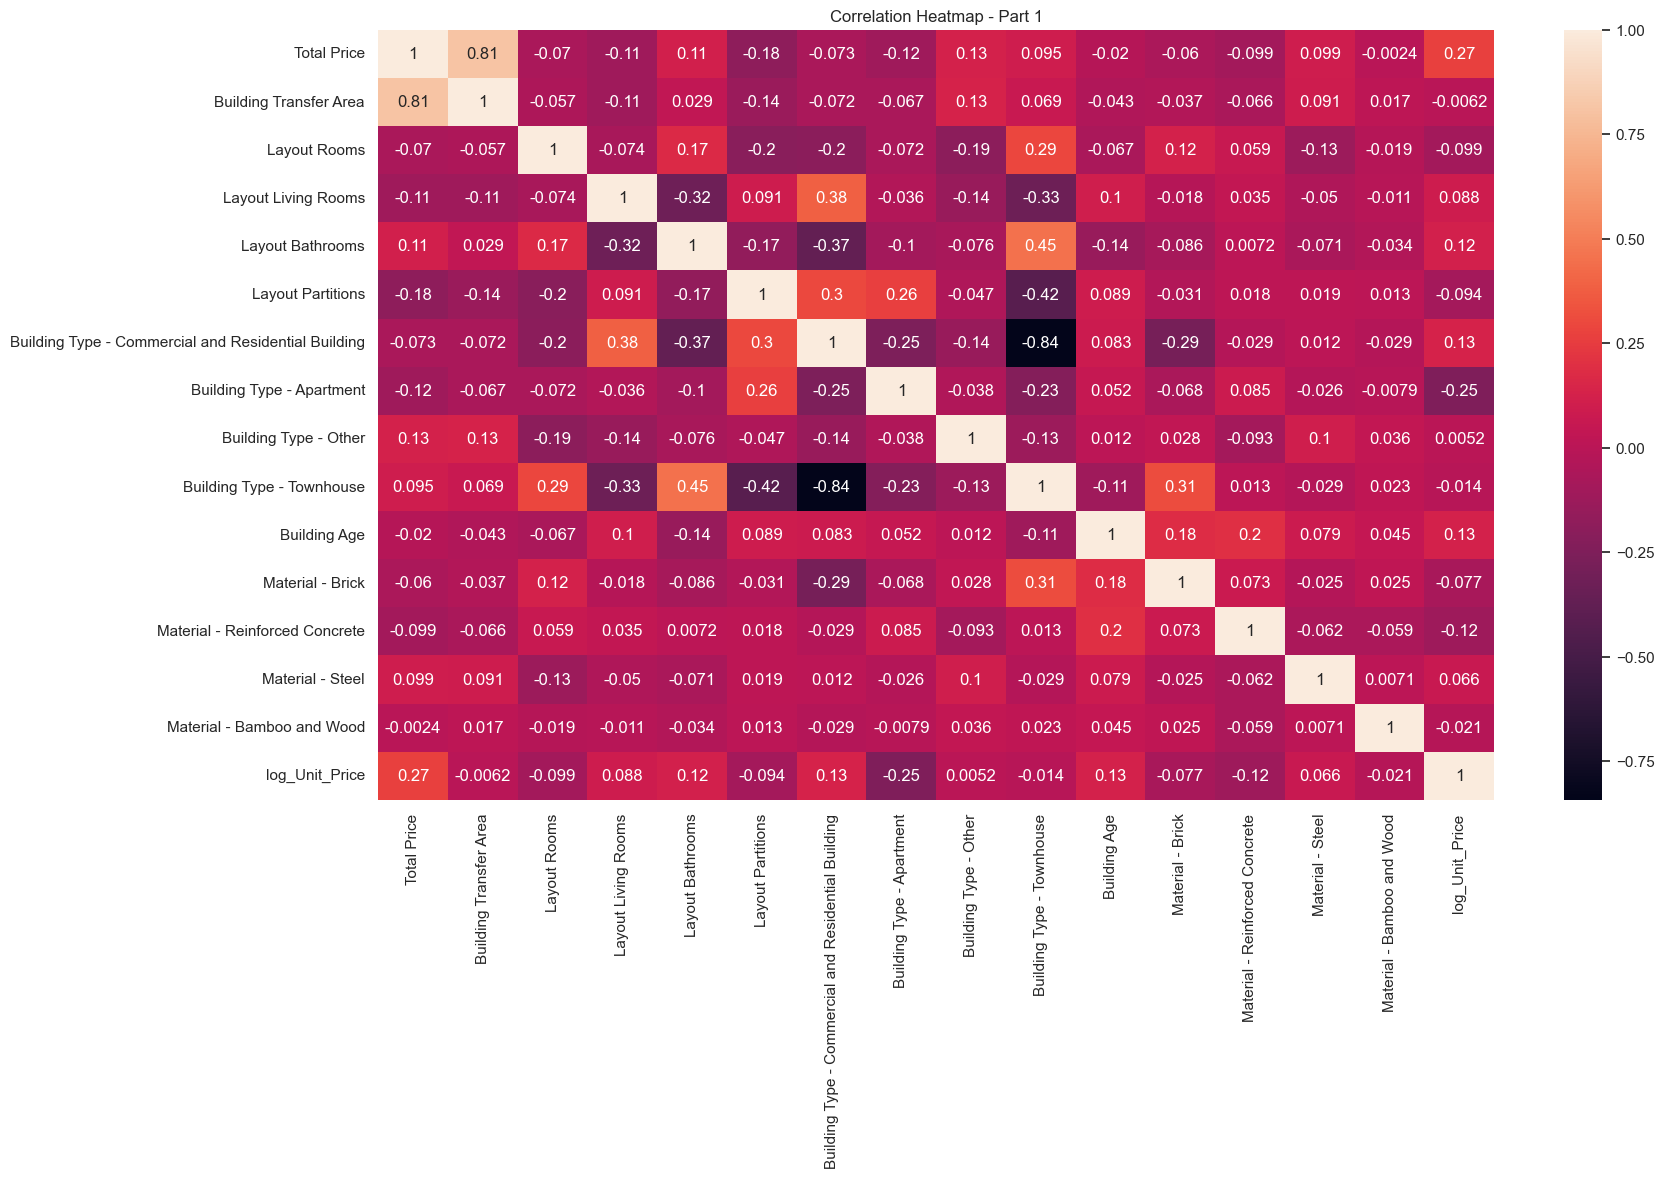

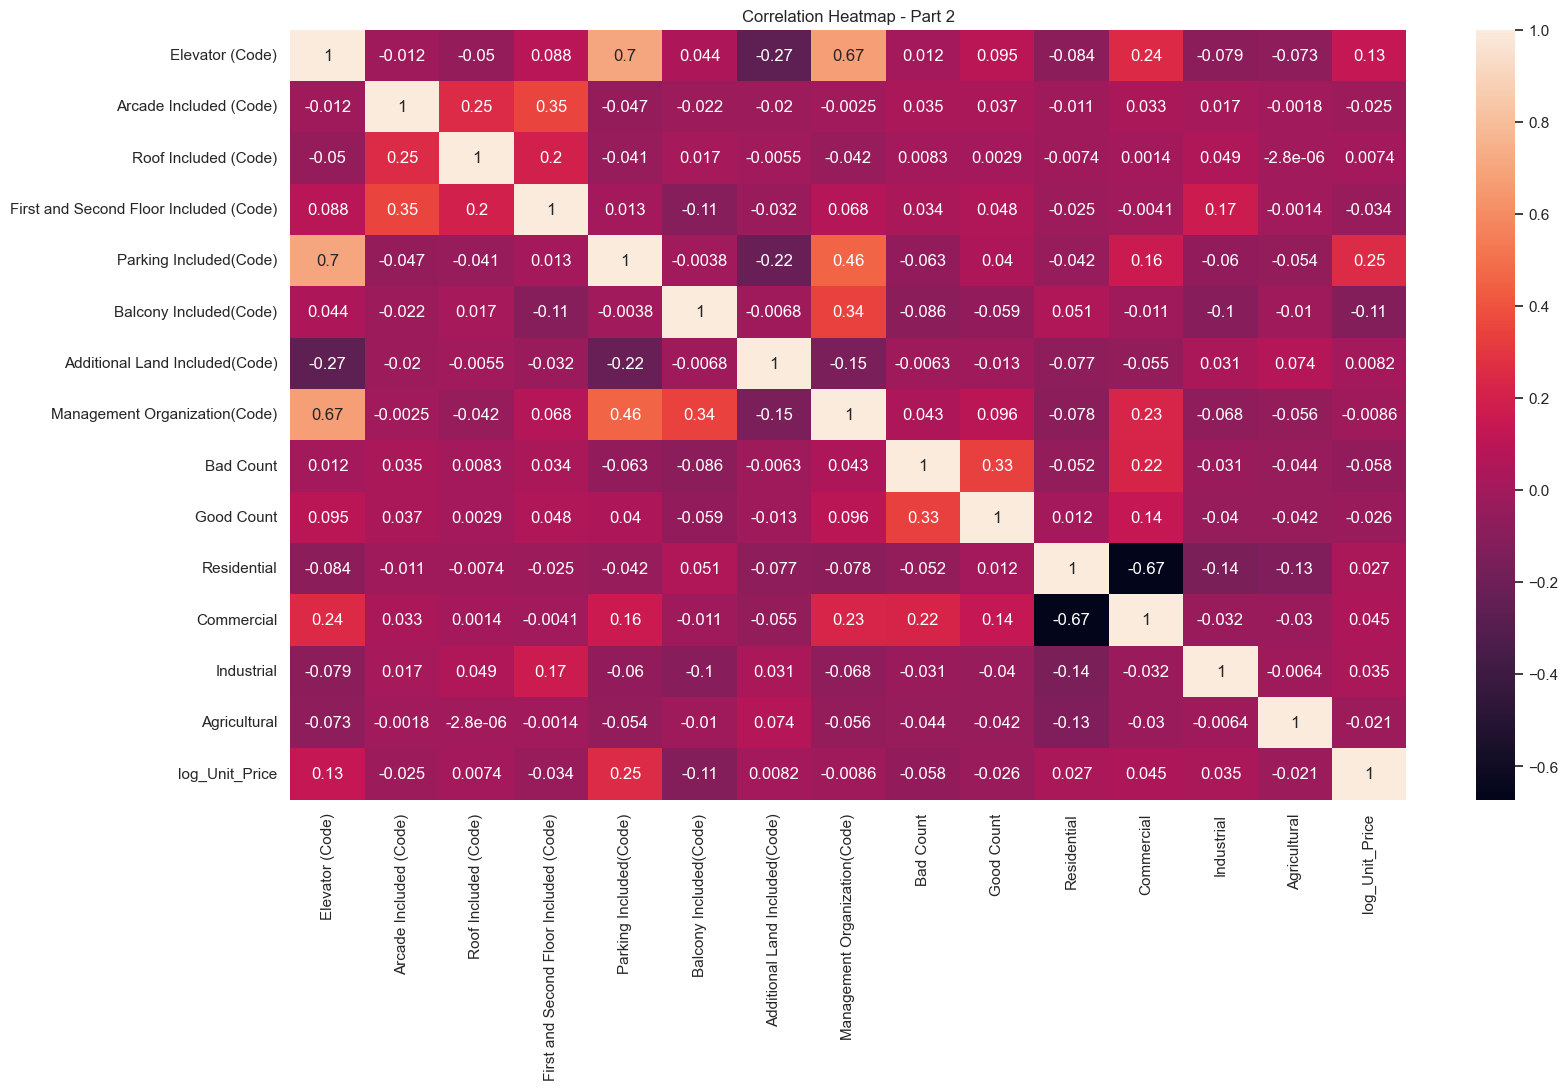

In [45]:

df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Transaction Date','Unit Price'], errors='ignore')

# 將數值型欄位拆分為兩部分，確保 'Unit Price Per Square Meter' 在第一部分中
split_point = len(df_numeric.columns) // 2
columns_part1 = list(df_numeric.columns[:split_point])  # 第一部分欄位
columns_part2 = list(df_numeric.columns[split_point:])  # 第二部分欄位

# 確保 'Unit Price Per Square Meter' 在第一部分中
if 'log_Unit_Price' not in columns_part1:
    columns_part1.append('log_Unit_Price')

# 計算相關係數矩陣（第一部分）
corrmat_part1 = df_numeric[columns_part1].corr()

# 計算相關係數矩陣（第二部分）
corrmat_part2 = df_numeric[columns_part2].corr()

# 繪製第一部分的熱圖（包含 'Unit Price Per Square Meter'）
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat_part1, annot=True, annot_kws={'size': 12})
plt.title('Correlation Heatmap - Part 1')
plt.show()

# 繪製第二部分的熱圖
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat_part2, annot=True, annot_kws={'size': 12})
plt.title('Correlation Heatmap - Part 2')
plt.show()


- 高相關特徵：你應該重點考慮與 log_Unit_Price（單價）有較高正相關的特徵，如 Total Price（總價）、Building Transfer Area（建築面積）、Parking Included（停車位），因為這些特徵對單價的影響相對較大。
- 低相關特徵：對於與單價相關性較弱的特徵，如 建築材料（Material）、管理組織（Management Organization），你可以考慮是否需要在後續模型中保留這些特徵，因為它們對單價的解釋能力有限。

In [49]:
import statsmodels.api as sm
from scipy import stats

In [50]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:         log_Unit_Price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     2534.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:24:39   Log-Likelihood:            -1.3516e+05
No. Observations:              232434   AIC:                         2.704e+05
Df Residuals:                  232410   BIC:                         2.706e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

使用 VIF（方差膨脹因子） 來檢查多重共線性問題。VIF 大於 10 通常表示該變數存在嚴重的多重共線性，可以考慮移除該變數。
- Building Type - Commercial and Residential Bui...        inf
- Building Type - Townhouse  39.144169
- Elevator (Code)        inf

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 計算每個變數的 VIF
X = df_cleaned[['Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions',
       'Building Type - Commercial and Residential Building',
       'Building Type - Apartment', 'Building Type - Other',
       'Building Type - Townhouse', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Elevator (Code)',
       'Arcade Included (Code)', 'Roof Included (Code)',
       'First and Second Floor Included (Code)', 'Parking Included(Code)',
       'Balcony Included(Code)', 'Additional Land Included(Code)',
       'Management Organization(Code)', 'Bad Count', 'Good Count',
       'Residential', 'Commercial', 'Industrial', 'Agricultural']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                                              feature        VIF
0                                        Layout Rooms   1.219274
1                                 Layout Living Rooms   1.315149
2                                    Layout Bathrooms   1.481576
3                                   Layout Partitions   1.384802
4   Building Type - Commercial and Residential Bui...        inf
5                           Building Type - Apartment   7.114577
6                               Building Type - Other   3.005063
7                           Building Type - Townhouse  39.144169
8                                        Building Age   2.294382
9                                    Material - Brick   1.417274
10                     Material - Reinforced Concrete   1.112027
11                                   Material - Steel   1.070572
12                         Material - Bamboo and Wood   1.015635
13                                    Elevator (Code)        inf
14                       

In [52]:
# 1. 找出 VIF 大於 10 的變數
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# 2. 刪除這些變數，並檢查是否存在
for feature in high_vif_features:
    if feature in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=[feature])
        print(f"已刪除變數: {feature}")
    else:
        print(f"變數不存在: {feature}")

# 3. 重新檢查清理後的數據
print("清理後的數據:")
print(df_cleaned.head())


已刪除變數: Building Type - Commercial and Residential Building
已刪除變數: Building Type - Townhouse
已刪除變數: Elevator (Code)
清理後的數據:
  Transaction Date  Total Price  Building Transfer Area  Layout Rooms  \
0       2022-09-02      2170000                   43.51      0.250000   
1       2022-08-01      4500000                   69.20      0.428571   
2       2022-08-04      8440000                  130.97      0.000000   
3       2022-08-01      1200000                  110.40      0.444444   
5       2022-08-02      1250000                   24.02      0.333333   

   Layout Living Rooms  Layout Bathrooms  Layout Partitions  \
0             0.250000          0.250000           0.250000   
1             0.142857          0.285714           0.142857   
2             0.000000          0.000000           0.000000   
3             0.222222          0.222222           0.111111   
5             0.000000          0.333333           0.333333   

   Building Type - Apartment  Building Type - Other  Buildi

In [53]:
df_cleaned.columns

Index(['Transaction Date', 'Total Price', 'Building Transfer Area',
       'Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions', 'Building Type - Apartment',
       'Building Type - Other', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Arcade Included (Code)',
       'Roof Included (Code)', 'First and Second Floor Included (Code)',
       'Parking Included(Code)', 'Balcony Included(Code)',
       'Additional Land Included(Code)', 'Management Organization(Code)',
       'Bad Count', 'Good Count', 'Residential', 'Commercial', 'Industrial',
       'Agricultural', 'Unit Price', 'log_Unit_Price'],
      dtype='object')

In [54]:
# 設定特徵欄位
X_columns = ['Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions', 'Building Type - Apartment',
       'Building Type - Other', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Arcade Included (Code)',
       'Roof Included (Code)', 'First and Second Floor Included (Code)',
       'Parking Included(Code)', 'Balcony Included(Code)',
       'Additional Land Included(Code)', 'Management Organization(Code)',
       'Bad Count', 'Good Count', 'Residential', 'Commercial', 'Industrial',
       'Agricultural']

# 選擇特徵和標籤
X = df_cleaned[X_columns]  # 特徵 X
y = df_cleaned['log_Unit_Price']  # 標籤 y

# 查看特徵與標籤
print(X.head())  # 查看 X 的前幾行
print('---'*20)
print(y.head())  # 查看 y 的前幾行

   Layout Living Rooms  Layout Bathrooms  Layout Partitions  \
0             0.250000          0.250000           0.250000   
1             0.142857          0.285714           0.142857   
2             0.000000          0.000000           0.000000   
3             0.222222          0.222222           0.111111   
5             0.000000          0.333333           0.333333   

   Building Type - Apartment  Building Type - Other  Building Age  \
0                          0                      0            27   
1                          0                      0            47   
2                          0                      0            22   
3                          0                      0            46   
5                          0                      0            30   

   Material - Brick  Material - Reinforced Concrete  Material - Steel  \
0                 0                               1                 0   
1                 1                               1         

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [56]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(162703, 23)
Shape of X_test:(69731, 23)
Shape of y_train:(162703,)
Shape of y_test(69731,)


### LinearRegression

In [57]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.20037446026678318
R2_score (test):  0.20066536008888625
RMSE:  0.432886059809038
RMSE:  0.4326956001651044


1. R-squared 與 Adjusted R-squared 值：
- R-squared: 0.211：模型解釋了 21.1% 的變異性，這表明該模型只能解釋單價變化的一小部分。可能還有許多未包含在模型中的重要特徵，或者現有特徵與單價的相關性不夠高。
- Adjusted R-squared: 0.211：調整後的 R-squared 值與 R-squared 值相同，表明模型中沒有太多不必要的變數，但整體解釋能力依然較低。
2. P 值與顯著性：
- 大部分變數的 P 值 很小（接近 0），表明這些變數對於解釋目標變數（log_Unit_Price）是顯著的。
- 但一些變數的 P 值很高，如 Building Type - Commercial and Residential Building 和 Building Type - Apartment，P 值遠大於 0.05，表明它們對目標變數的解釋能力不顯著，可能需要考慮從模型中移除。
3. 係數的解釋：
- Layout Rooms：係數為 -0.577，表明房間數量每增加一個，單價（對數變換後）會下降 0.577 個單位。這可能暗示較大房屋反而單位面積的單價較低。
- Layout Bathrooms：係數為 1.1126，顯示衛浴數量增加對單價有顯著的正向影響。
Parking Included (Code)：係數為 0.2822，表示有停車位的房產單價顯著更高。
4. 多重共線性問題：
- Cond. No.（條件數）：6.10e+14：這是一個非常高的值，通常條件數超過 30 就表示有潛在的多重共線性問題。回歸結果中也指出「這可能表明存在強烈的多重共線性或設計矩陣是奇異的」。
- 多重共線性會導致回歸係數不穩定，變數之間的關係難以區分，影響模型的解釋能力和穩定性。

### Polynomial regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [61]:
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_poly2_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.3565843390163973
R2_score (test):  0.34837048893339184
RMSE:  0.3883077744977531
RMSE:  0.3906776209426392


#### degree = 3
- R2_score (train):  0.4323312197654634
- R2_score (test):  0.2797326616449679
- RMSE:  0.3647352829620128
- RMSE:  0.4107381312900227

### Lasso regression

In [62]:
from sklearn.linear_model import LassoCV

# 使用 LassoCV 自動選擇最佳 alpha 值
lasso_cv = LassoCV(alphas=[0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0], cv=5)
lasso_cv.fit(X_train, y_train)

# 得到最佳 alpha
best_alpha = lasso_cv.alpha_
print(f"選擇的最佳 alpha: {best_alpha}")

# 預測訓練集和測試集
y_pred_lasso_train = lasso_cv.predict(X_train)
y_pred_lasso_test = lasso_cv.predict(X_test)

# 計算 R2 和 RMSE
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print(f"訓練集 R2_score: {r2_score_lasso_train}")
print(f"測試集 R2_score: {r2_score_lasso_test}")
print(f"訓練集 RMSE: {rmse_lasso_train}")
print(f"測試集 RMSE: {rmse_lasso_test}")


選擇的最佳 alpha: 0.01
訓練集 R2_score: 0.12771242058870036
測試集 R2_score: 0.1278416544353197
訓練集 RMSE: 0.4521266600380473
測試集 RMSE: 0.4519764769303111


In [63]:
lasso = Lasso(alpha = 0.01) # , positive=True
lasso.fit(X_train,y_train)

y_pred_lasso_train = lasso.predict(X_train)
r2_score_lasso_train = lasso.score(X_train, y_train)

y_pred_lasso_test = lasso.predict(X_test)
r2_score_lasso_test = lasso.score(X_test, y_test)

rmse_lasso_train = (np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print("coef：")
for i, j in zip(df_cleaned.columns, lasso.coef_):
    print(i, j)

coef：
Transaction Date 0.0
Total Price 0.0
Building Transfer Area -0.0
Layout Rooms -0.2658429590977135
Layout Living Rooms 0.0
Layout Bathrooms 0.001957103164159278
Layout Partitions -0.0
Building Type - Apartment -0.08582572461933956
Building Type - Other 0.0
Building Age -0.0
Material - Brick -0.0
Material - Reinforced Concrete 0.0
Material - Steel -0.0
Material - Bamboo and Wood 0.1807255942719568
Arcade Included (Code) -0.0
Roof Included (Code) 0.010904635660146798
First and Second Floor Included (Code) -0.011635943717764588
Parking Included(Code) -0.002139546200950107
Balcony Included(Code) -0.0
Additional Land Included(Code) 0.0
Management Organization(Code) 0.0
Bad Count 0.0
Good Count -0.0


In [64]:
print("R2_score (train): ",r2_score_lasso_train)
print("R2_score (test):", r2_score_lasso_test)
print("train_RMSE: ", rmse_lasso_train)
print("test_RMSE: ", rmse_lasso_test)

R2_score (train):  0.12771242058870036
R2_score (test): 0.1278416544353197
train_RMSE:  0.4521266600380473
test_RMSE:  0.4519764769303111


### Ridge regression

In [66]:
from sklearn.linear_model import Ridge

In [71]:
from sklearn.linear_model import RidgeCV
import numpy as np

# 定義一組可能的 alpha 值範圍
alphas = np.logspace(-6, 6, 13)  # 這會產生一組從 10^-6 到 10^6 的 alpha 值

# 使用 RidgeCV 進行交叉驗證來選擇最佳 alpha
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # store_cv_values=True 會保存每個 alpha 的交叉驗證結果
ridge_cv.fit(X_train, y_train)

# 獲取最佳的 alpha
best_alpha = ridge_cv.alpha_
print(f"選擇的最佳 alpha: {best_alpha}")

# 獲取最佳模型的 R2 分數
r2_train = ridge_cv.score(X_train, y_train)
r2_test = ridge_cv.score(X_test, y_test)

print(f"訓練集 R²: {r2_train}")
print(f"測試集 R²: {r2_test}")


選擇的最佳 alpha: 1.0
訓練集 R²: 0.20037436284108046
測試集 R²: 0.20066381006738476


In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridgeReg = Ridge(alpha=1.0)

# 訓練模型
ridgeReg.fit(X_train, y_train)

# 預測訓練集和測試集
y_pred_ridge_train = ridgeReg.predict(X_train)
y_pred_ridge_test = ridgeReg.predict(X_test)

# 計算 R2 和 RMSE
r2_score_ridge_train = ridgeReg.score(X_train, y_train)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# 打印結果
print(f"R2_score (train): {r2_score_ridge_train}")
print(f"R2_score (test): {r2_score_ridge_test}")
print(f"RMSE (train): {rmse_ridge_train}")
print(f"RMSE (test): {rmse_ridge_test}")

# 打印每個特徵的係數
print("coef：")
for feature_name, coef in zip(X_columns, ridgeReg.coef_):
    print(feature_name, coef)


R2_score (train): 0.2003743628411223
R2_score (test): 0.200663809627586
RMSE (train): 0.4328860861802625
RMSE (test): 0.43269601981253614
coef：
Layout Living Rooms 0.49087713001102434
Layout Bathrooms 1.180699176807946
Layout Partitions -0.4070013994880319
Building Type - Apartment -0.36175647407025036
Building Type - Other 0.03015241455432725
Building Age 0.0013616795289639013
Material - Brick -0.11593726338293456
Material - Reinforced Concrete -0.1315519169909224
Material - Steel 0.19509588253540527
Material - Bamboo and Wood -0.30203546993171815
Arcade Included (Code) -0.09195832446746241
Roof Included (Code) 0.07119897824825665
First and Second Floor Included (Code) 0.0009440764898841792
Parking Included(Code) 0.24533627801991426
Balcony Included(Code) -0.11848196701517144
Additional Land Included(Code) 0.055013392973063124
Management Organization(Code) -0.04165512963732884
Bad Count -0.0012065871732395265
Good Count 0.0012070444326426626
Residential 0.15614098961780404
Commercial 

### Random Forest Regressor
預測
- 訓練數據的高擬合度：模型在訓練數據上的 MSE 低，R² 分數接近 1，這說明模型對訓練數據的擬合度非常高。
- 測試數據上的表現下降：測試數據的 MSE 遠高於訓練數據，R² 分數有所下降，這可能表明模型存在過度擬合問題，
即模型在訓練數據上學習得太好，但在未見過的數據上（測試集）表現較差。

In [76]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

In [74]:
df_cleaned.columns

Index(['Transaction Date', 'Total Price', 'Building Transfer Area',
       'Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions', 'Building Type - Apartment',
       'Building Type - Other', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Arcade Included (Code)',
       'Roof Included (Code)', 'First and Second Floor Included (Code)',
       'Parking Included(Code)', 'Balcony Included(Code)',
       'Additional Land Included(Code)', 'Management Organization(Code)',
       'Bad Count', 'Good Count', 'Residential', 'Commercial', 'Industrial',
       'Agricultural', 'Unit Price', 'log_Unit_Price'],
      dtype='object')

In [89]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# 選擇特徵和標籤
X_columns = ['Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions', 'Building Type - Apartment',
       'Building Type - Other', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Arcade Included (Code)',
       'Roof Included (Code)', 'First and Second Floor Included (Code)',
       'Parking Included(Code)', 'Balcony Included(Code)',
       'Additional Land Included(Code)', 'Management Organization(Code)',
       'Bad Count', 'Good Count', 'Residential', 'Commercial', 'Industrial',
       'Agricultural']

# 選擇特徵 X 和標籤 y
X = df_cleaned[X_columns]
y = df_cleaned['Unit Price']

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Rfr = rfr(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1)

# 訓練模型
Rfr.fit(X_train, y_train)

x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)

# 對訓練集和測試集進行預測
y_train_pred = Rfr.predict(X_train)
y_test_pred = Rfr.predict(X_test)

mse_train = metrics.mean_squared_error(y_train, x_train_pred)
mse_test = metrics.mean_squared_error(y_test, x_test_pred)

print('MSE train data: {:,.3f}, MSE test data: {:,.3f}'.format(mse_train, mse_test))

r2_train = metrics.r2_score(y_train, x_train_pred)
r2_test = metrics.r2_score(y_test, x_test_pred)

print('R2 train data: {:.3f}, R2 test data: {:.3f}'.format(r2_train, r2_test))

# # 計算 MSE
# mse_train = metrics.mean_squared_error(y_train, y_train_pred)
# mse_test = metrics.mean_squared_error(y_test, y_test_pred)

# print('MSE train data: {:,.3f}, MSE test data: {:,.3f}'.format(mse_train, mse_test))

# # 計算 R2 分數
# r2_train = metrics.r2_score(y_train, y_train_pred)
# r2_test = metrics.r2_score(y_test, y_test_pred)

# print('R2 train data: {:.3f}, R2 test data: {:.3f}'.format(r2_train, r2_test))


MSE train data: 58,465,739.686, MSE test data: 178,763,816.031
R2 train data: 0.873, R2 test data: 0.611


##### 方法一：
Rfr = rfr(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1)
- MSE train data: 58,465,739.686, MSE test data: 178,763,816.031
- R2 train data: 0.873, R2 test data: 0.611

##### 方法二：
###### 數據標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 初始化 RandomForestRegressor 模型
Rfr = rfr(n_estimators=200, max_depth=10, random_state=1, n_jobs=-1)
- MSE train data: 222,432,872.838, MSE test data: 230,092,501.094
- R2 train data: 0.516, R2 test data: 0.499

### 模型的 預測值 與 實際值 之間的關係
1. 總體來看，大部分預測值和實際值接近紅色參考線，說明模型具有一定的預測能力。
2. 訓練數據 的預測較為精確，這可以從藍色點大多緊貼紅線得出結論。
3. 測試數據 的預測誤差相對較大，尤其在高價位的部分房地產上，模型的預測值偏低，這可能表明模型對某些極端數據的擬合效果不夠好，或者存在過擬合現象。

### 殘差圖
1. 模型在低價位房地產的預測效果較好：低價位的殘差較集中，且誤差較小，這表明模型在預測低價位的房地產時表現得更穩定。
2. 模型在高價位房地產的預測效果較差：圖中的橙色叉號在高價位區域的殘差變異較大，並且一些點偏離紅色參考線較遠，說明模型對高價位房地產的預測準確性較低。這可能與模型未能充分捕捉數據中的某些高價位特徵有關。

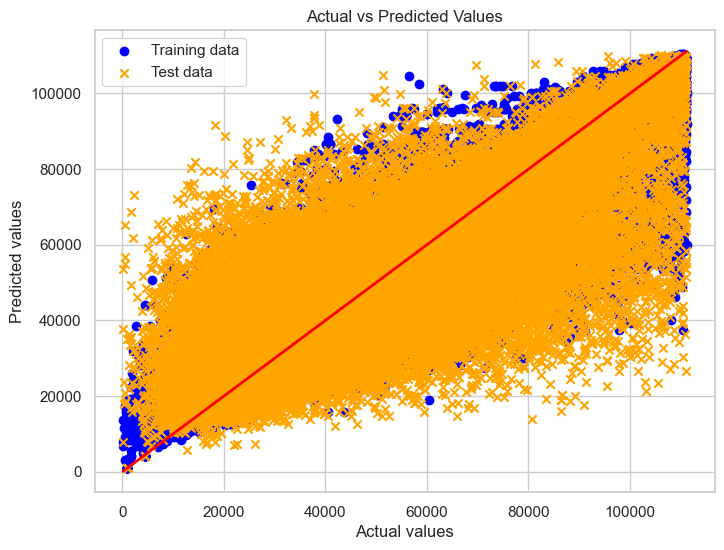

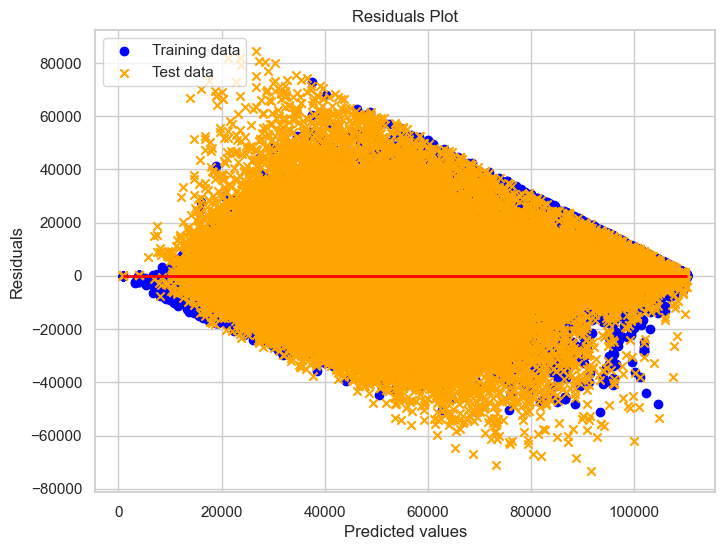

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 模型預測值與實際值的散點圖
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred, c='orange', marker='x', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 劃一條 y=x 參考線
plt.show()

# 殘差圖
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test - y_test_pred, c='orange', marker='x', label='Test data')
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend(loc='upper left')
plt.show()


Feature importance ranking
1. Building Age (0.465)
2. Bad Count (0.134)
3. Good Count (0.068)
4. Layout Partitions (0.059)
5. Layout Bathrooms (0.057)
6. Layout Living Rooms (0.048)
7. Additional Land Included(Code) (0.025)
8. Residential (0.020)
9. Material - Reinforced Concrete (0.017)
10. Balcony Included(Code) (0.017)


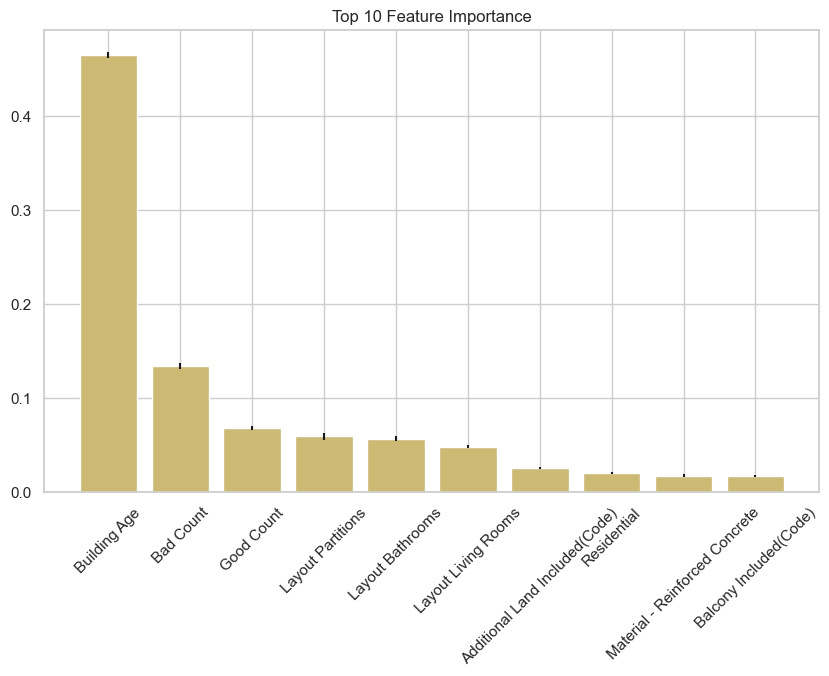

In [92]:
print('Feature importance ranking')

importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]  # 按重要性從大到小排序

variables = ['Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions', 'Building Type - Apartment',
       'Building Type - Other', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Arcade Included (Code)',
       'Roof Included (Code)', 'First and Second Floor Included (Code)',
       'Parking Included(Code)', 'Balcony Included(Code)',
       'Additional Land Included(Code)', 'Management Organization(Code)',
       'Bad Count', 'Good Count', 'Residential', 'Commercial', 'Industrial',
       'Agricultural']

importance_list = []

# 遍歷前 10 個特徵並打印排名
for f in range(10):  # 只取前 10 名
    variable = variables[indices[f]]  # 從 indices 中提取對應的變量名稱
    importance_list.append(variable)
    print("%d. %s (%.3f)" % (f + 1, variable, importances[indices[f]]))

# 繪製前 10 個特徵的重要性圖
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importance')
plt.bar(importance_list, importances[indices[:10]], color='y', yerr=std[indices[:10]], align='center')
plt.xticks(rotation=45)
plt.show()


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from collections import Counter

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.colors as mcolors

In [63]:
df_cleaned.columns

Index(['Transaction Date', 'Total Price', 'Building Transfer Area',
       'Layout Rooms', 'Layout Living Rooms', 'Layout Bathrooms',
       'Layout Partitions',
       'Building Type - Commercial and Residential Building',
       'Building Type - Apartment', 'Building Type - Other',
       'Building Type - Townhouse', 'Building Age', 'Material - Brick',
       'Material - Reinforced Concrete', 'Material - Steel',
       'Material - Bamboo and Wood', 'Elevator (Code)',
       'Arcade Included (Code)', 'Roof Included (Code)',
       'First and Second Floor Included (Code)', 'Parking Included(Code)',
       'Balcony Included(Code)', 'Additional Land Included(Code)',
       'Management Organization(Code)', 'Bad Count', 'Good Count',
       'Residential', 'Commercial', 'Industrial', 'Agricultural', 'Unit Price',
       'log_Unit_Price'],
      dtype='object')

In [73]:
df_cleaned_2 = df_cleaned.drop(['Transaction Date','Unit Price'], axis=1)

In [74]:
# 訓練模型並獲取特徵重要性
X = df_cleaned_2.drop('log_Unit_Price', axis=1)
y = df_cleaned_2['log_Unit_Price']

from sklearn.ensemble import RandomForestRegressor

# 使用 RandomForestRegressor 替代 RandomForestClassifier
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 獲取特徵重要性
feature_importance = rf.feature_importances_

# 輸出特徵重要性
for name, importance in zip(X.columns, feature_importance):
    print(f"{name}: {importance}")

Total Price: 0.6872578222414706
Building Transfer Area: 0.3083961648975198
Layout Rooms: 0.00021932992150003726
Layout Living Rooms: 0.00037641658318527733
Layout Bathrooms: 0.00024426206200082464
Layout Partitions: 0.0007077273179338651
Building Type - Commercial and Residential Building: 0.00010238380179881111
Building Type - Apartment: 1.60117672922776e-05
Building Type - Other: 2.2228166074214122e-05
Building Type - Townhouse: 2.589073703015392e-05
Building Age: 0.000940698704675922
Material - Brick: 5.969910310524181e-06
Material - Reinforced Concrete: 9.44742347449827e-05
Material - Steel: 3.379751135590127e-05
Material - Bamboo and Wood: 1.0453973989952926e-06
Elevator (Code): 0.00011060291386883188
Arcade Included (Code): 6.513309971975928e-06
Roof Included (Code): 2.4675570142427313e-06
First and Second Floor Included (Code): 4.104798144584031e-05
Parking Included(Code): 0.00027860376355561196
Balcony Included(Code): 0.00010681893983572477
Additional Land Included(Code): 7.552

In [75]:
# 計算相關性矩陣
correlation_matrix = df_cleaned_2.corr()

# 顯示重要性結果
features = X.columns
importance = feature_importance * 100  # 將特徵重要性百分比化

# 將特徵和重要性進行排序
sorted_idx = np.argsort(importance)[::-1]
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

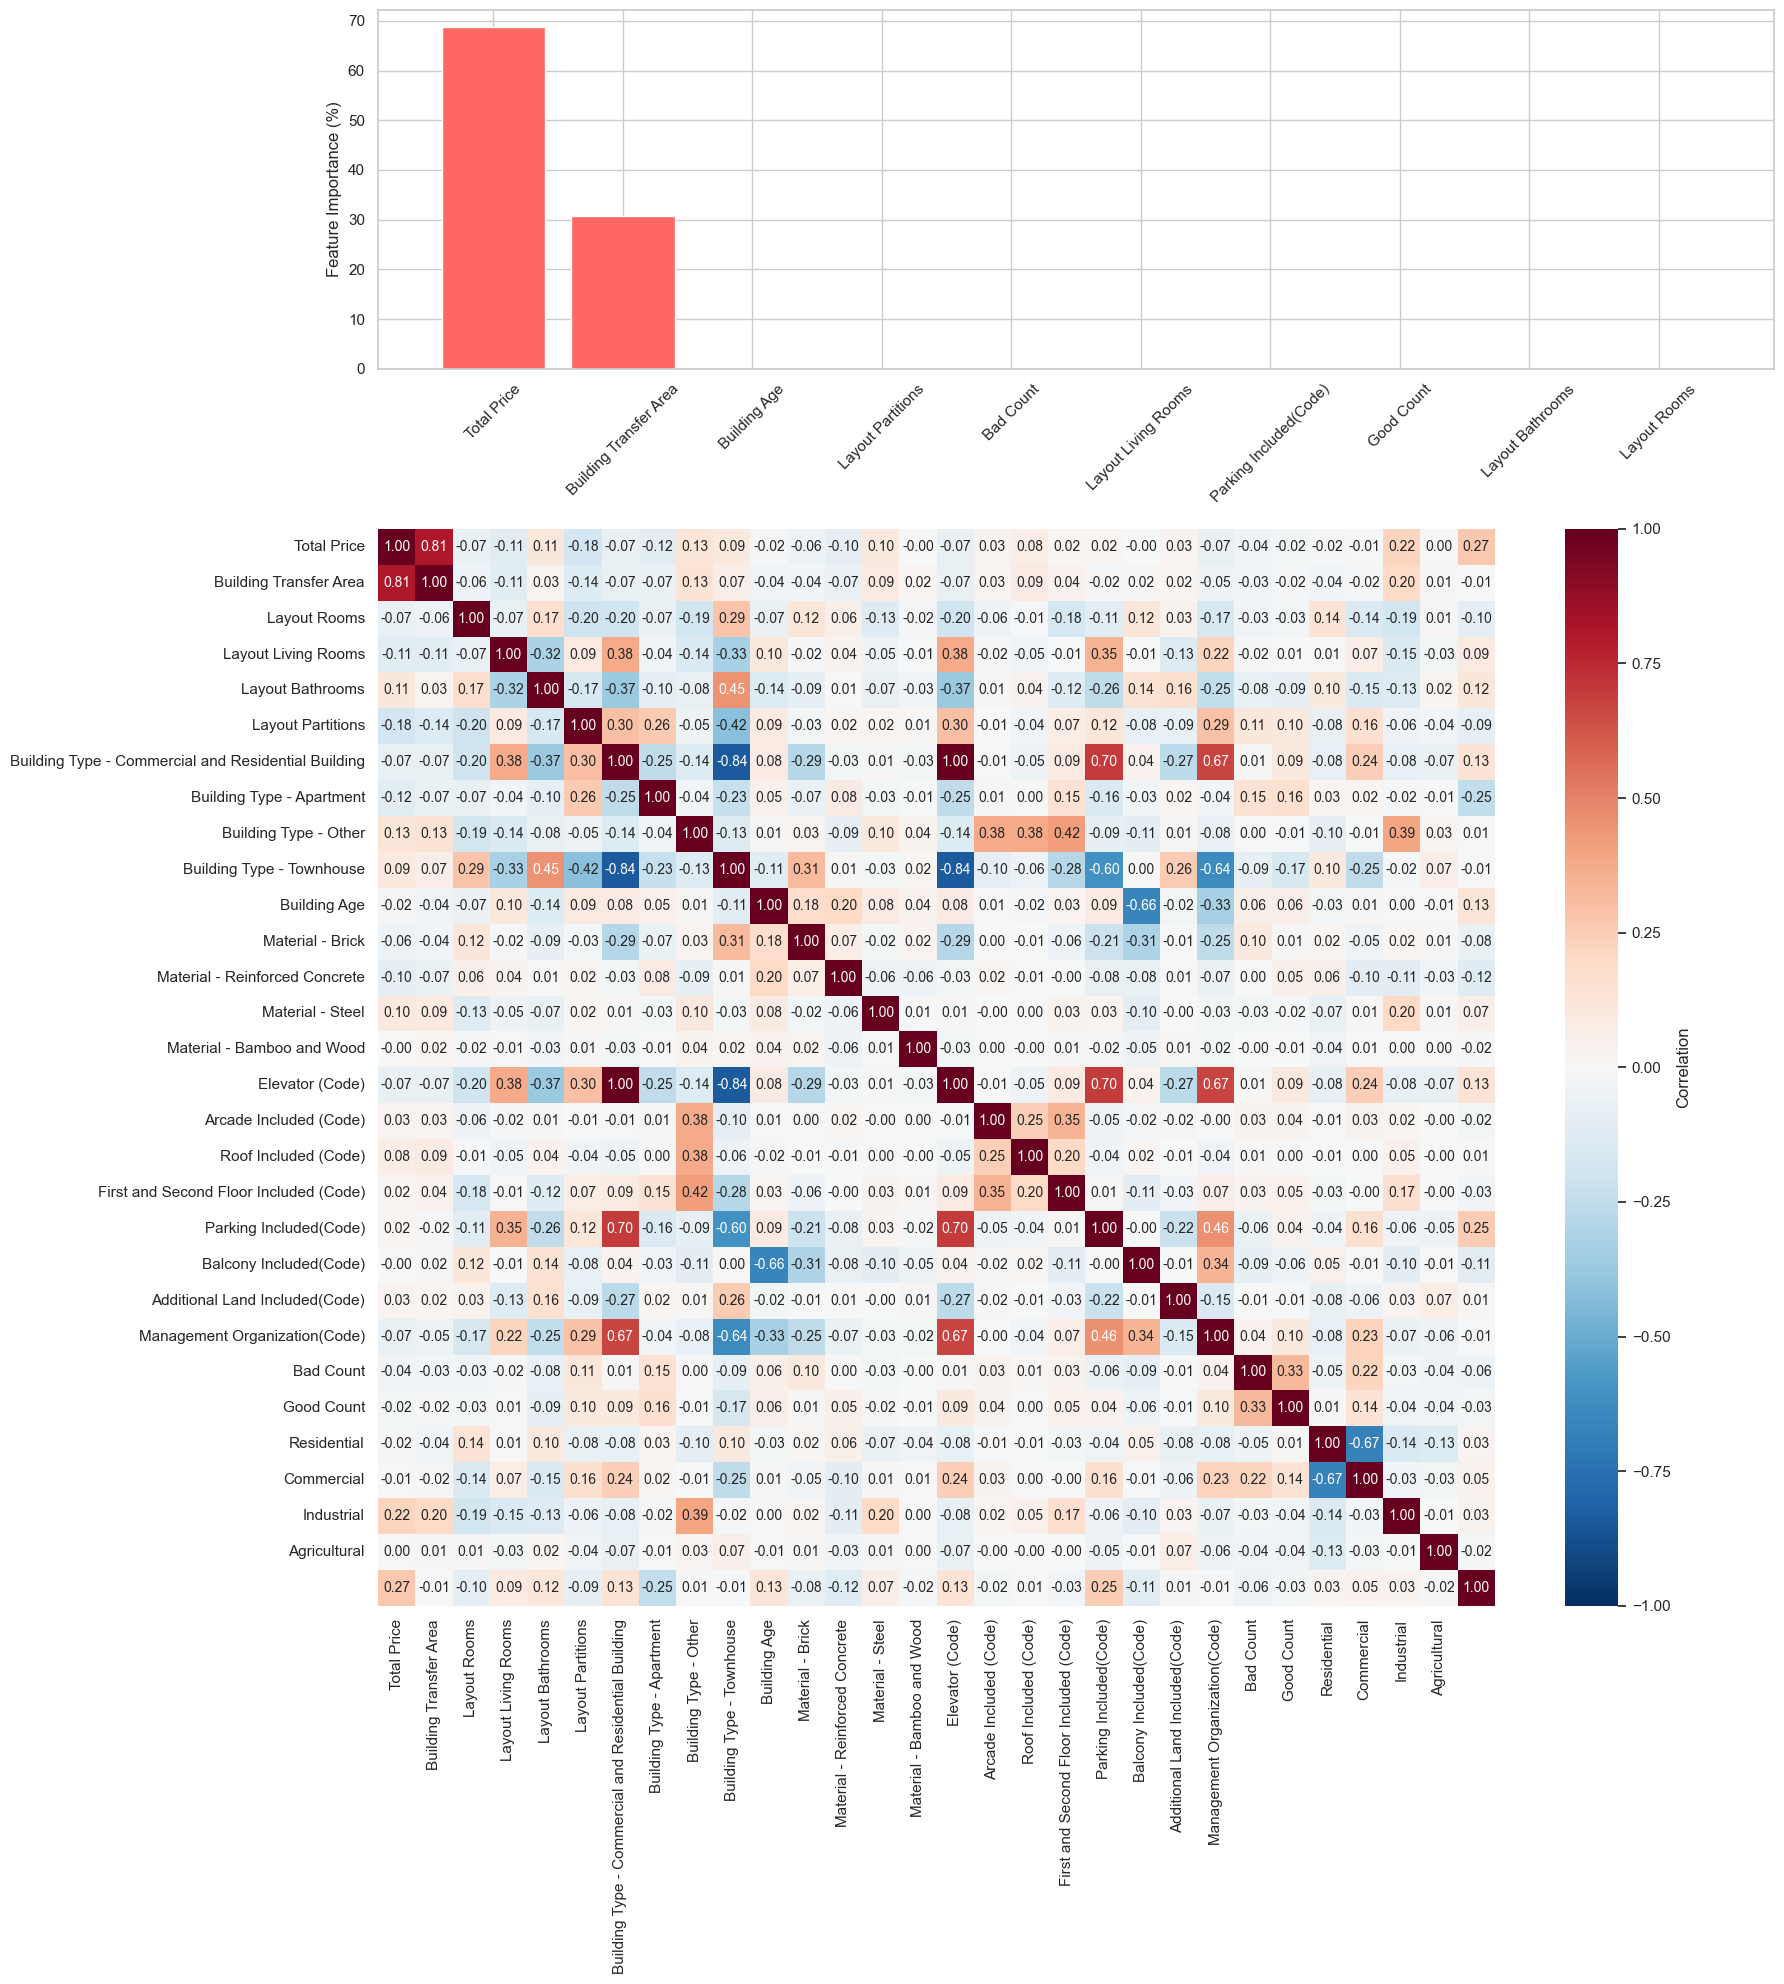

In [76]:
# 只取前 10 名特徵
top_n = 10
sorted_features_top_n = sorted_features[:top_n]
sorted_importance_top_n = sorted_importance[:top_n]

# 創建畫布
fig, (ax_bar, ax_heatmap) = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [1, 3]}, figsize=(18, 20)
)

# 設定顏色，針對前三名特徵進行強調
colors = ['steelblue'] * len(sorted_importance_top_n)
colors[:3] = ['#ff6666', '#ff6666', '#ff6666']  # 強調前三名特徵

# 繪製解釋方差長條圖（重要性已排序），並針對前三名特徵進行顏色調整
ax_bar.bar(range(len(sorted_importance_top_n)), sorted_importance_top_n, color=colors)
ax_bar.set_ylabel("Feature Importance (%)")
ax_bar.set_xticks(range(len(sorted_features_top_n)))
ax_bar.set_xticklabels(sorted_features_top_n, rotation=45)

# 繪製相關性矩陣熱圖，顯示小數點後兩位
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0, 
            ax=ax_heatmap, cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1,
            xticklabels=features, yticklabels=features, annot_kws={"size": 10})

# 調整佈局
plt.tight_layout()
plt.show()


In [78]:
from sklearn.linear_model import Ridge

# 使用 Ridge 回歸模型進行預測
model = Ridge()

# 進行交叉驗證
scores = []
for n in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    # 使用 Ridge 進行迴歸
    score = cross_val_score(model, X_pca, y, cv=10, scoring='neg_mean_squared_error').mean()
    scores.append(score)

# 找出性能最佳的 n_components
best_n_components = np.argmax(scores) + 1

print(f"最佳的 n_components: {best_n_components}")


最佳的 n_components: 28
